# CR 6 RSM

## Load Packages

In [1]:
## Load Packages
## Install R Packages

install.packages("rsm")
library(rsm)

library(reshape2)

install.packages("desirability")
library(desirability)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Layer Thickness = lh
lh_low = .16 
lh_hi = .24 

# Print Speed = ps
ps_low = 50 
ps_hi = 60 

# Infill Density = id
id_low = .25 
id_hi = .15 

# Raster Width = rw
rw_low = .4 
rw_hi = .8 

# Wall Thicknessv = wt
wt_low = 1.2 
wt_hi = .8

## Read data and save relevant variables.

In [3]:
## Read data and save relevant variables.

fn.data.cost <- "https://raw.githubusercontent.com/wilsongis/3DP_Experiments/main/Data/cr6_cost.txt"
fn.data.time <- "https://raw.githubusercontent.com/wilsongis/3DP_Experiments/main/Data/cr6_time.txt"
df <- read.table(fn.data.cost, header=TRUE)
str(df)

'data.frame':	16 obs. of  15 variables:
 $ lh   : int  -1 1 -1 1 -1 1 -1 1 -1 1 ...
 $ ps   : int  -1 -1 1 1 -1 -1 1 1 -1 -1 ...
 $ id   : int  -1 -1 -1 -1 1 1 1 1 -1 -1 ...
 $ wt   : int  -1 -1 -1 -1 -1 -1 -1 -1 1 1 ...
 $ rw   : int  1 -1 -1 1 -1 1 1 -1 -1 1 ...
 $ alh  : num  0.16 0.28 0.16 0.28 0.16 0.28 0.16 0.28 0.16 0.28 ...
 $ aps  : int  50 50 60 60 50 50 60 60 50 50 ...
 $ aid  : num  0.25 0.25 0.25 0.25 0.15 0.15 0.15 0.15 0.25 0.25 ...
 $ awt  : num  0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.8 0.8 ...
 $ arw  : num  0.8 1.2 1.2 0.8 1.2 0.8 0.8 1.2 1.2 0.8 ...
 $ cost1: num  0.51 0.51 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...
 $ cost2: num  0.51 0.51 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...
 $ cost3: num  0.51 0.51 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...
 $ cost4: num  0.51 0.51 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...
 $ cost5: num  0.51 0.48 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...


In [4]:
df

lh ps id wt rw alh  aps aid  awt arw cost1 cost2 cost3 cost4 cost5
1  -1 -1 -1 -1  1 0.16 50  0.25 0.4 0.8 0.51  0.51  0.51  0.51  0.51 
2   1 -1 -1 -1 -1 0.28 50  0.25 0.4 1.2 0.51  0.51  0.51  0.51  0.48 
3  -1  1 -1 -1 -1 0.16 60  0.25 0.4 1.2 0.54  0.54  0.54  0.54  0.54 
4   1  1 -1 -1  1 0.28 60  0.25 0.4 0.8 0.51  0.51  0.51  0.51  0.51 
5  -1 -1  1 -1 -1 0.16 50  0.15 0.4 1.2 0.54  0.54  0.54  0.54  0.54 
6   1 -1  1 -1  1 0.28 50  0.15 0.4 0.8 0.50  0.50  0.50  0.50  0.50 
7  -1  1  1 -1  1 0.16 60  0.15 0.4 0.8 0.50  0.50  0.50  0.50  0.50 
8   1  1  1 -1 -1 0.28 60  0.15 0.4 1.2 0.54  0.54  0.54  0.54  0.54 
9  -1 -1 -1  1 -1 0.16 50  0.25 0.8 1.2 0.54  0.54  0.54  0.54  0.54 
10  1 -1 -1  1  1 0.28 50  0.25 0.8 0.8 0.56  0.56  0.56  0.56  0.56 
11 -1  1 -1  1  1 0.16 60  0.25 0.8 0.8 0.56  0.56  0.56  0.56  0.56 
12  1  1 -1  1 -1 0.28 60  0.25 0.8 1.2 0.54  0.54  0.54  0.54  0.54 
13 -1 -1  1  1  1 0.16 50  0.15 0.8 0.8 0.54  0.54  0.54  0.54  0.54 
14  1 -1  1  1 -1 0.28 50  0.15 0.8 1.2 0.54  0.54  0.54  0.54  0.54 
15 -1  1  1  1 -1 0.16 60  0.15 0.8 1.2 0.54  0.54  0.54  0.54  0.54 
16  1  1  1  1  1 0.28 60  0.15 0.8 0.8 0.54  0.54  0.54  0.54  0.54

In [5]:
# reshape data into long format
df.cost <- melt(df, id.vars = c("lh", "ps", "id", "wt", "rw", "alh", "aps", "aid", "awt", "arw"), variable.name = "rep", value.name = "cost")

In [6]:
# Summary of the original data

summary(df.cost)

       lh           ps           id           wt           rw    
 Min.   :-1   Min.   :-1   Min.   :-1   Min.   :-1   Min.   :-1  
 1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1  
 Median : 0   Median : 0   Median : 0   Median : 0   Median : 0  
 Mean   : 0   Mean   : 0   Mean   : 0   Mean   : 0   Mean   : 0  
 3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1  
 Max.   : 1   Max.   : 1   Max.   : 1   Max.   : 1   Max.   : 1  
      alh            aps          aid            awt           arw     
 Min.   :0.16   Min.   :50   Min.   :0.15   Min.   :0.4   Min.   :0.8  
 1st Qu.:0.16   1st Qu.:50   1st Qu.:0.15   1st Qu.:0.4   1st Qu.:0.8  
 Median :0.22   Median :55   Median :0.20   Median :0.6   Median :1.0  
 Mean   :0.22   Mean   :55   Mean   :0.20   Mean   :0.6   Mean   :1.0  
 3rd Qu.:0.28   3rd Qu.:60   3rd Qu.:0.25   3rd Qu.:0.8   3rd Qu.:1.2  
 Max.   :0.28   Max.   :60   Max.   :0.25   Max.   :0.8   Max.   :1.2  
    rep          cost       
 cost

# Modelling

## Cost RSM

In [7]:
cost_rsm <- rsm(cost ~ SO(alh, aps, aid, awt, arw), data = df.cost)

Warning message in rsm(cost ~ SO(alh, aps, aid, awt, arw), data = df.cost):
“Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object.”


In [8]:
# externally Studentized residuals
cost_rsm$studres <- rstudent(cost_rsm)
summary(cost_rsm)


Call:
rsm(formula = cost ~ SO(alh, aps, aid, awt, arw), data = df.cost)

Residuals:
   Min     1Q Median     3Q    Max 
-0.024  0.000  0.000  0.000  0.006 

Coefficients: (5 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          0.3748333  0.0361704  10.363 2.54e-15 ***
FO(alh, aps, aid, awt, arw)alh       0.0041667  0.0819680   0.051  0.95962    
FO(alh, aps, aid, awt, arw)aps      -0.0029833  0.0006021  -4.955 5.59e-06 ***
FO(alh, aps, aid, awt, arw)aid       0.0900000  0.0976281   0.922  0.36006    
FO(alh, aps, aid, awt, arw)awt       0.3050000  0.0249061  12.246  < 2e-16 ***
FO(alh, aps, aid, awt, arw)arw       0.1925000  0.0237500   8.105 2.10e-11 ***
TWI(alh, aps, aid, awt, arw)alh:aps  0.0033333  0.0012500   2.667  0.00969 ** 
TWI(alh, aps, aid, awt, arw)alh:aid -0.7500000  0.1250000  -6.000 1.01e-07 ***
TWI(alh, aps, aid, awt, arw)alh:awt  0.1875000  0.0312500   6.000 1.01e-07 *

In [9]:
## generate ANOVA table for selected model
anova(cost_rsm)

Df Sum Sq  Mean Sq   F value  Pr(>F)      
FO(alh, aps, aid, awt, arw)   5 0.01685 3.370e-03 299.5556 5.426872e-43
TWI(alh, aps, aid, awt, arw) 10 0.01285 1.285e-03 114.2222 7.421372e-37
Residuals                    64 0.00072 1.125e-05       NA           NA

## 3 Level Interactions

In [10]:
lm_cost3lvl <- lm(cost ~ (alh+ aps+ aid+ awt+ arw)^3, data = df.cost)
# externally Studentized residuals
lm_cost3lvl$studres <- rstudent(lm_cost3lvl)
summary(lm_cost3lvl)


Call:
lm(formula = cost ~ (alh + aps + aid + awt + arw)^3, data = df.cost)

Residuals:
   Min     1Q Median     3Q    Max 
-0.024  0.000  0.000  0.000  0.006 

Coefficients: (10 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3748333  0.0361704  10.363 2.54e-15 ***
alh          0.0041667  0.0819680   0.051  0.95962    
aps         -0.0029833  0.0006021  -4.955 5.59e-06 ***
aid          0.0900000  0.0976281   0.922  0.36006    
awt          0.3050000  0.0249061  12.246  < 2e-16 ***
arw          0.1925000  0.0237500   8.105 2.10e-11 ***
alh:aps      0.0033333  0.0012500   2.667  0.00969 ** 
alh:aid     -0.7500000  0.1250000  -6.000 1.01e-07 ***
alh:awt      0.1875000  0.0312500   6.000 1.01e-07 ***
alh:arw     -0.1875000  0.0312500  -6.000 1.01e-07 ***
aps:aid      0.0090000  0.0015000   6.000 1.01e-07 ***
aps:awt     -0.0022500  0.0003750  -6.000 1.01e-07 ***
aps:arw      0.0022500  0.0003750   6.000 1.01e-07 ***
aid:awt      

## Cost Interaction Plots

In [11]:
### Interactions: Layer Height

In [12]:
## Generate interaction plots.

par(mfrow=c(2,1), bg=rgb(1,1,0.8), mar=c(5, 8, 2, 4))

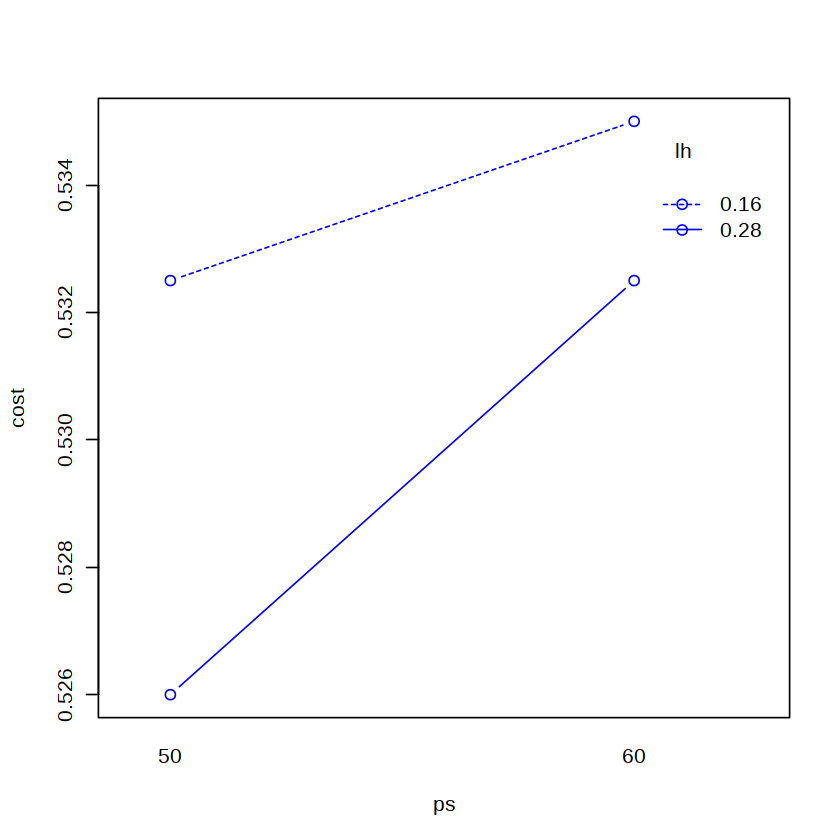

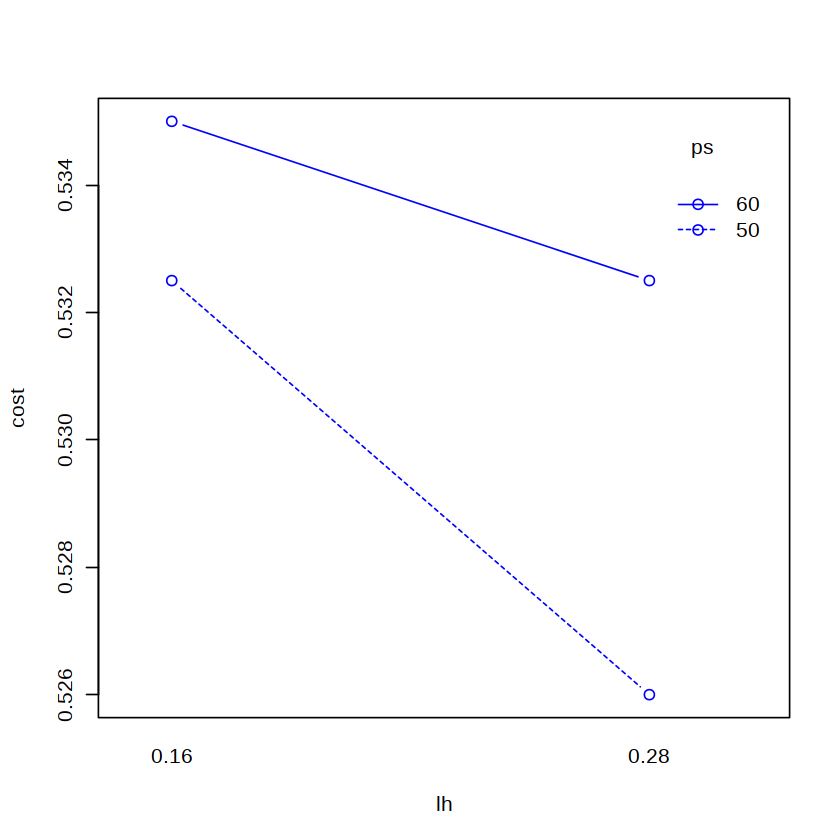

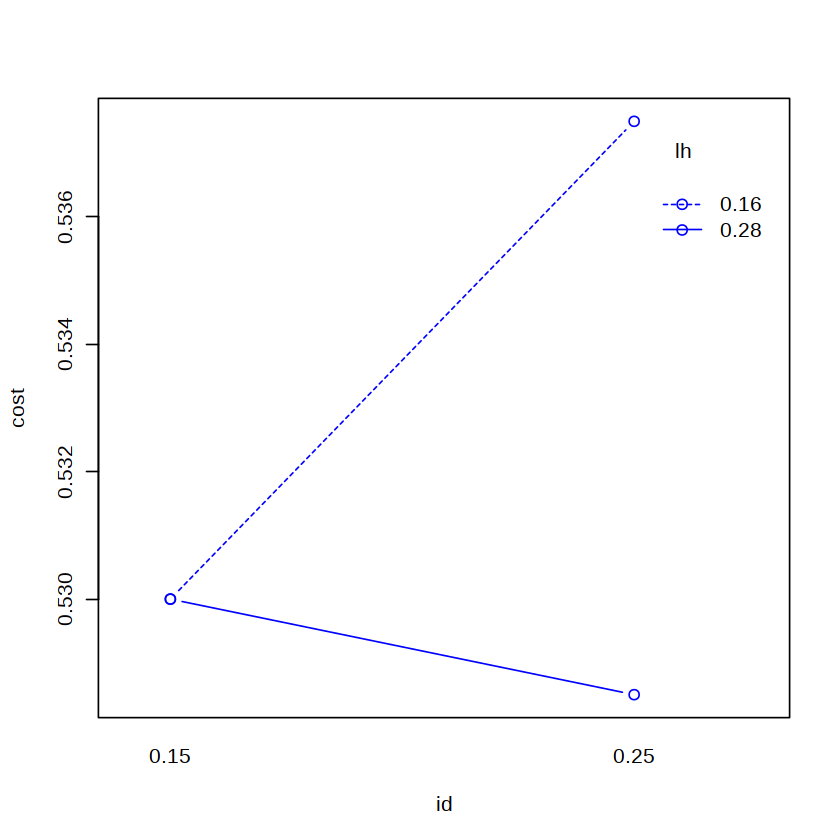

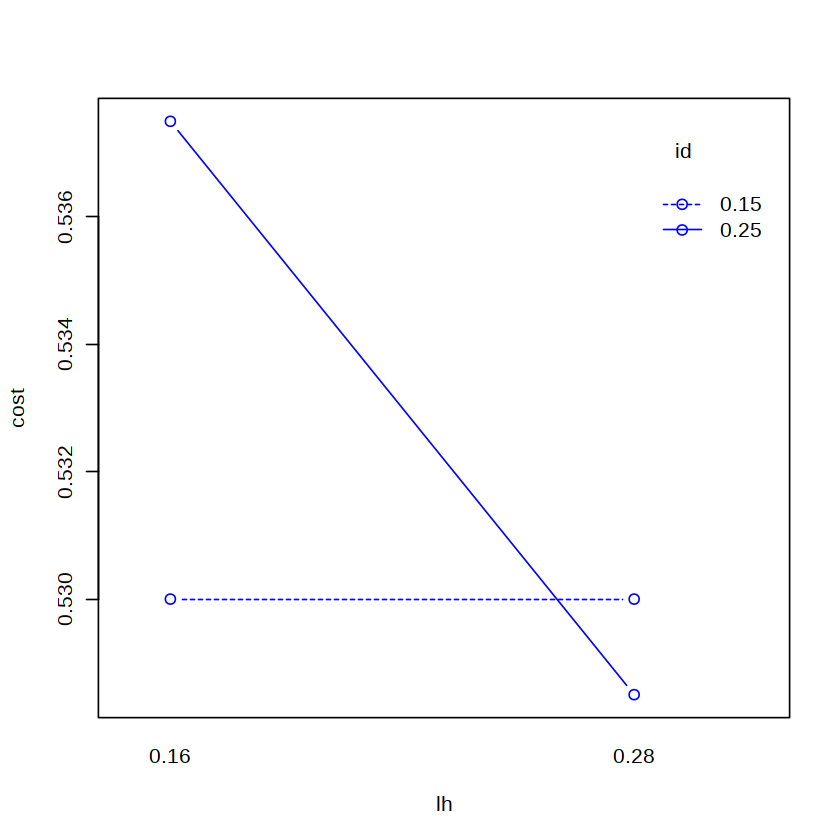

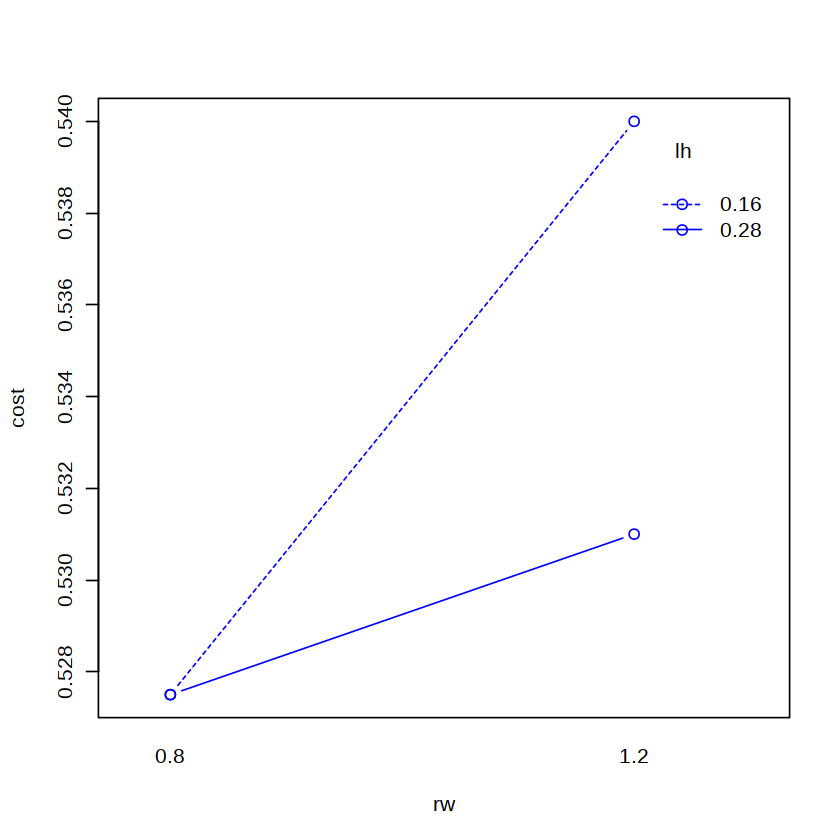

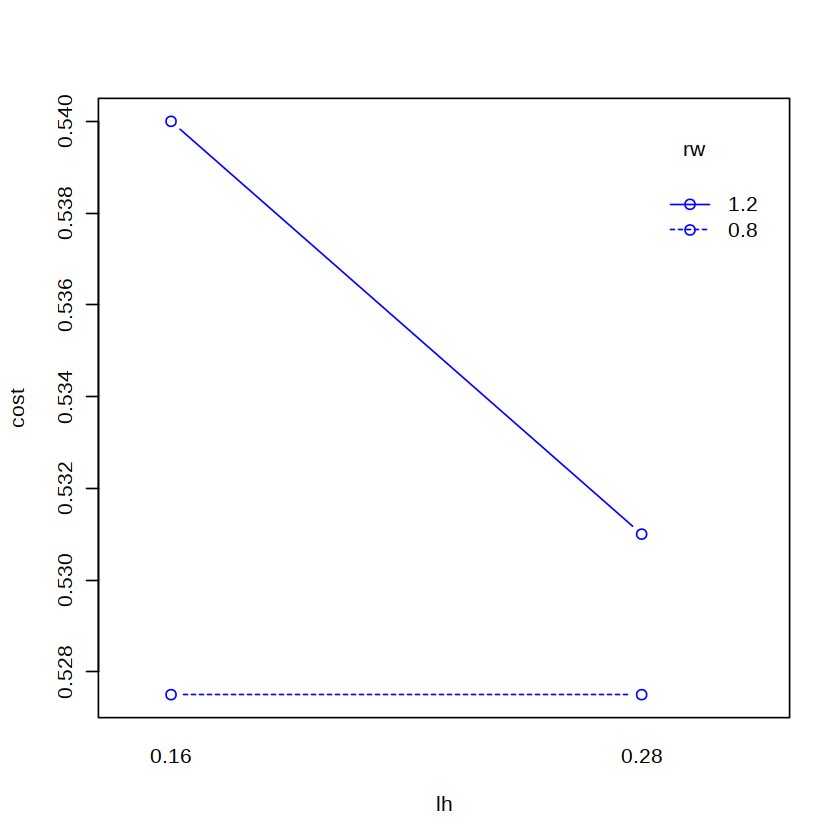

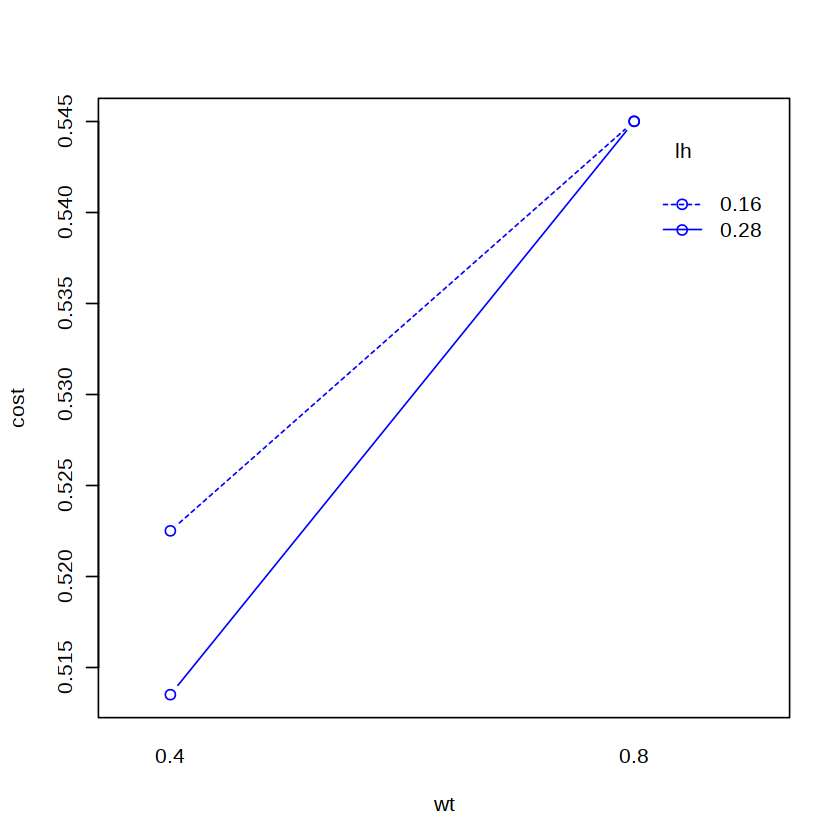

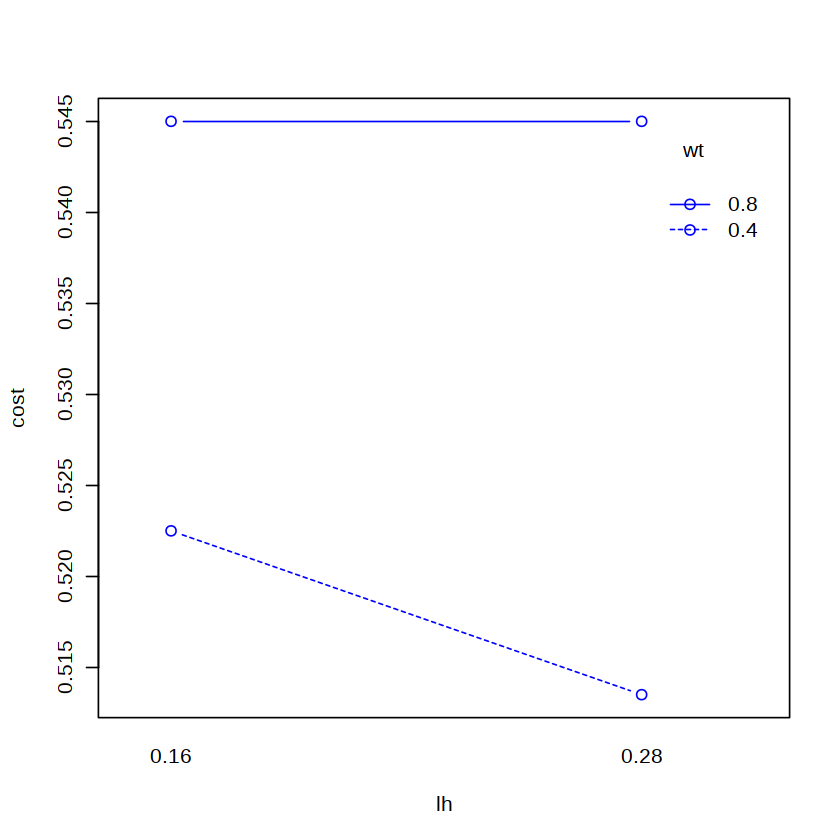

In [13]:
interaction.plot(df.cost$aps, df.cost$alh, df.cost$cost, fun=mean,type="b", pch=c(21,21), col=4,xlab="ps", ylab="cost", trace.lab="lh")

interaction.plot(df.cost$alh, df.cost$aps, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="ps", ylab="cost", xlab="lh")

interaction.plot(df.cost$aid, df.cost$alh, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="id", ylab="cost", trace.lab="lh")

interaction.plot(df.cost$alh, df.cost$aid, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="id", ylab="cost", xlab="lh")

interaction.plot(df.cost$arw, df.cost$alh, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="cost", trace.lab="lh")

interaction.plot(df.cost$alh, df.cost$arw, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="cost", xlab="lh")

interaction.plot(df.cost$awt, df.cost$alh, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="lh")

interaction.plot(df.cost$alh, df.cost$awt, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="lh")

### Interactions: Print Speed (ps)

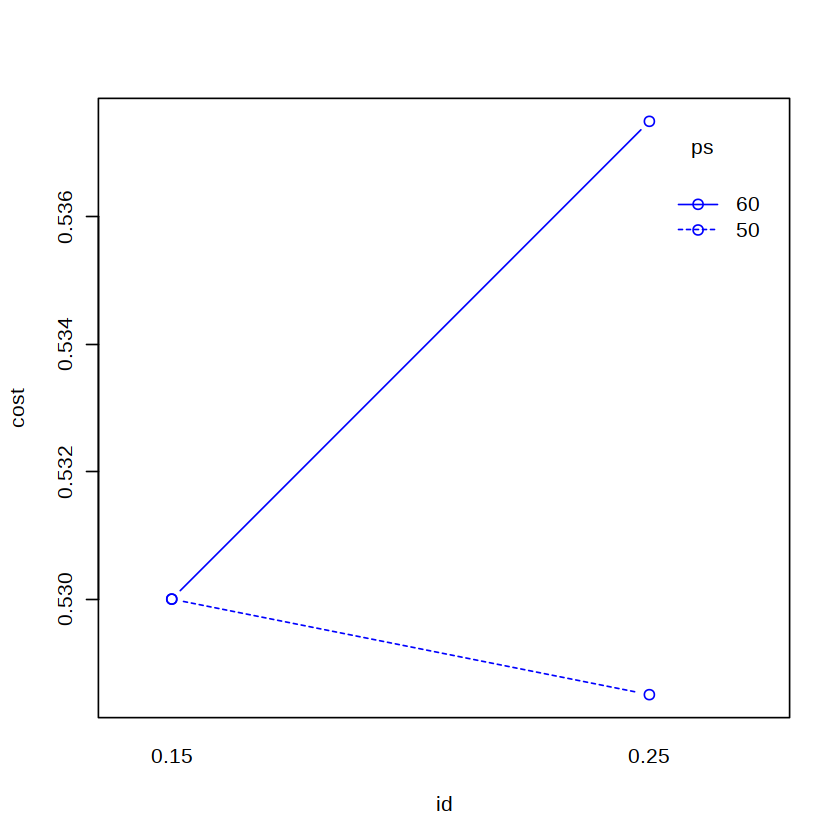

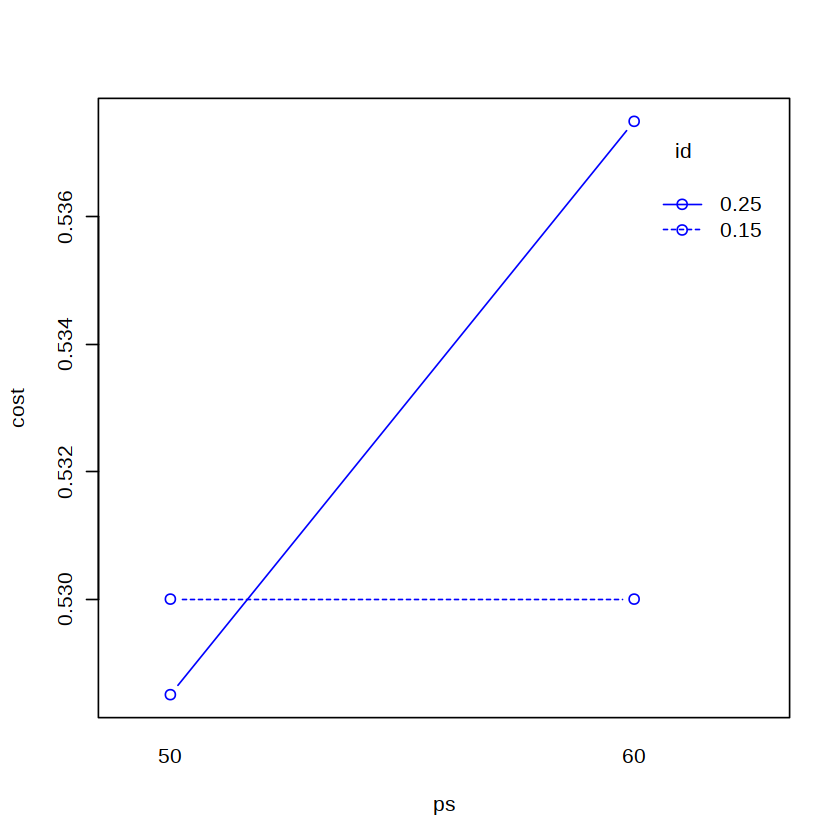

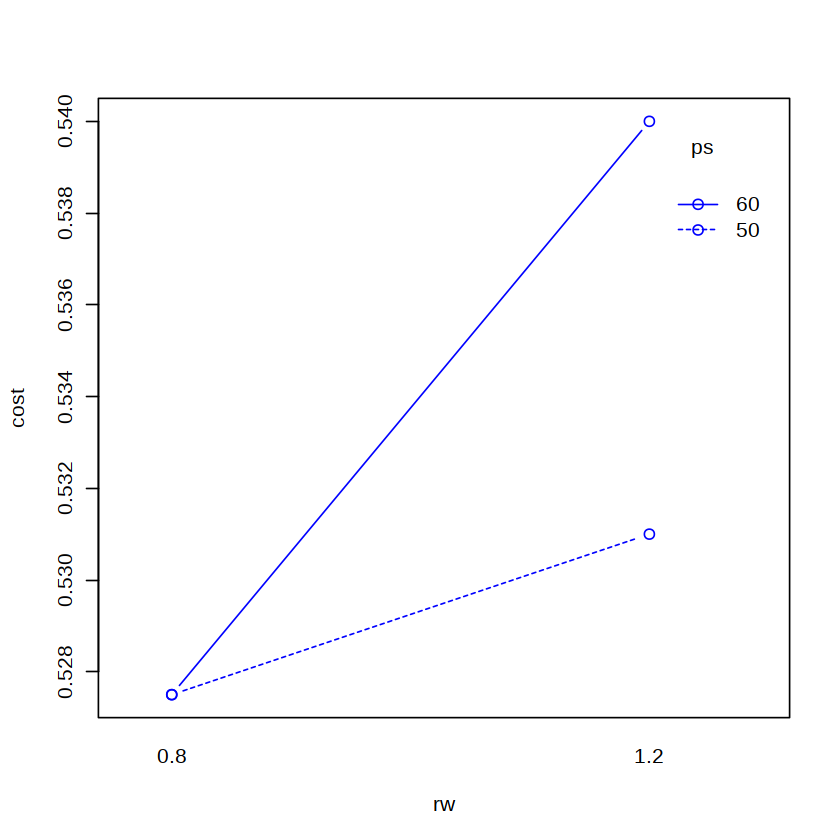

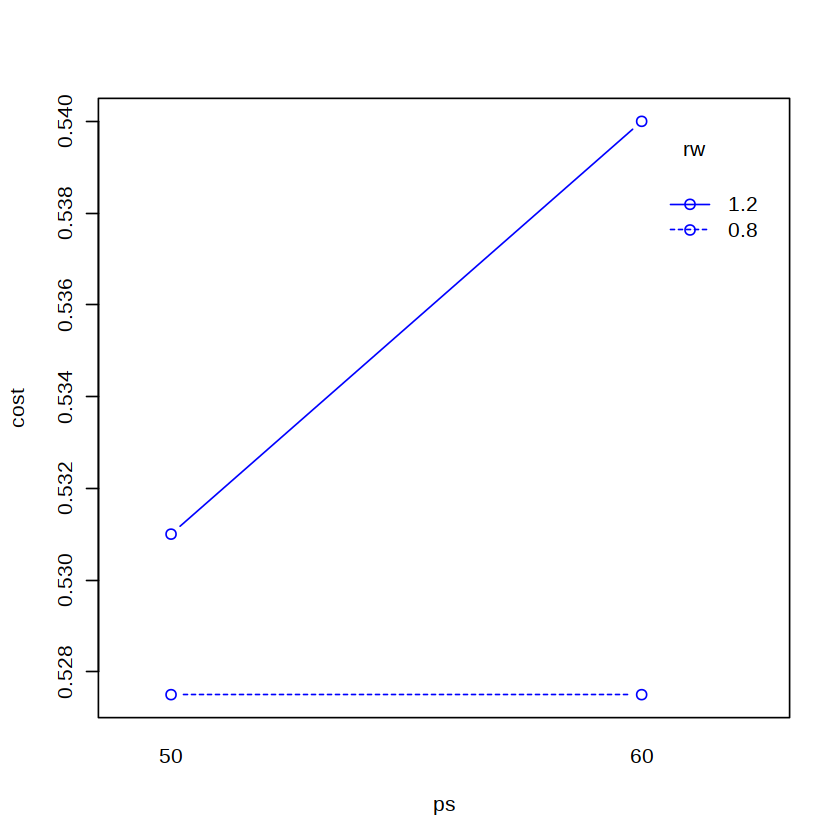

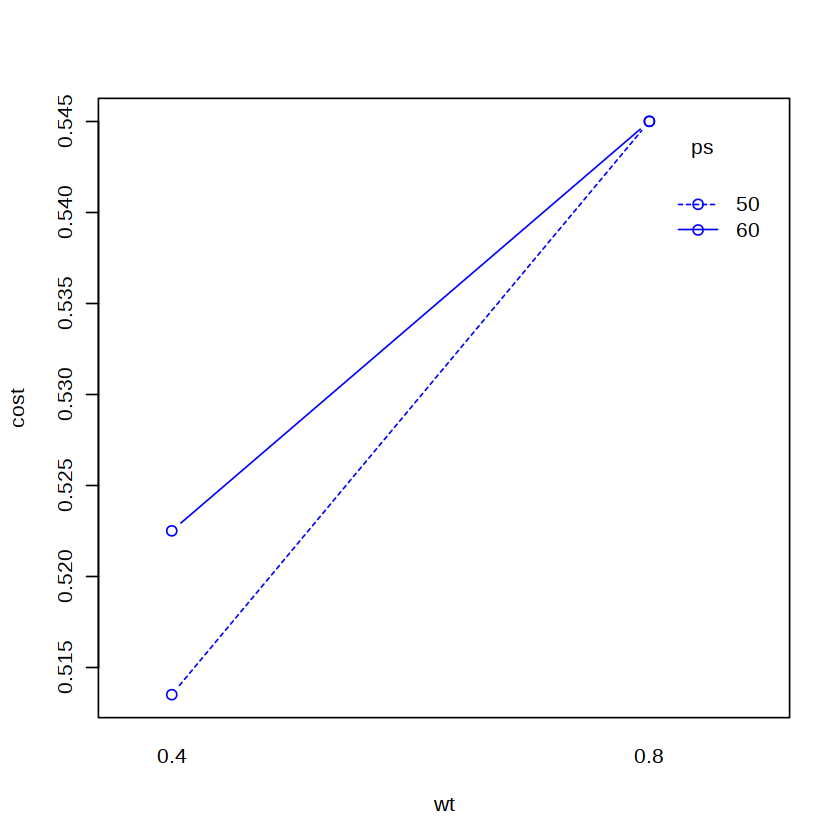

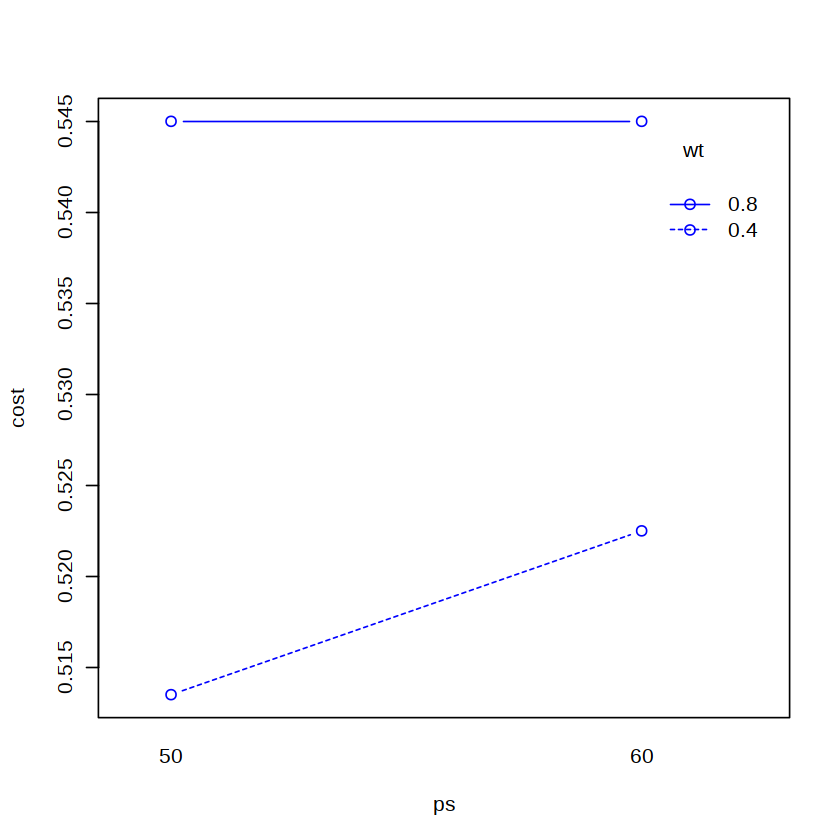

In [14]:
interaction.plot(df.cost$aid, df.cost$aps, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="id", ylab="cost", trace.lab="ps")

interaction.plot(df.cost$aps, df.cost$aid, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="id", ylab="cost", xlab="ps")

interaction.plot(df.cost$arw, df.cost$aps, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="cost", trace.lab="ps")

interaction.plot(df.cost$aps, df.cost$arw, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="cost", xlab="ps")

interaction.plot(df.cost$awt, df.cost$aps, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="ps")

interaction.plot(df.cost$aps, df.cost$awt, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="ps")


### Interactions: Infill Density (id)

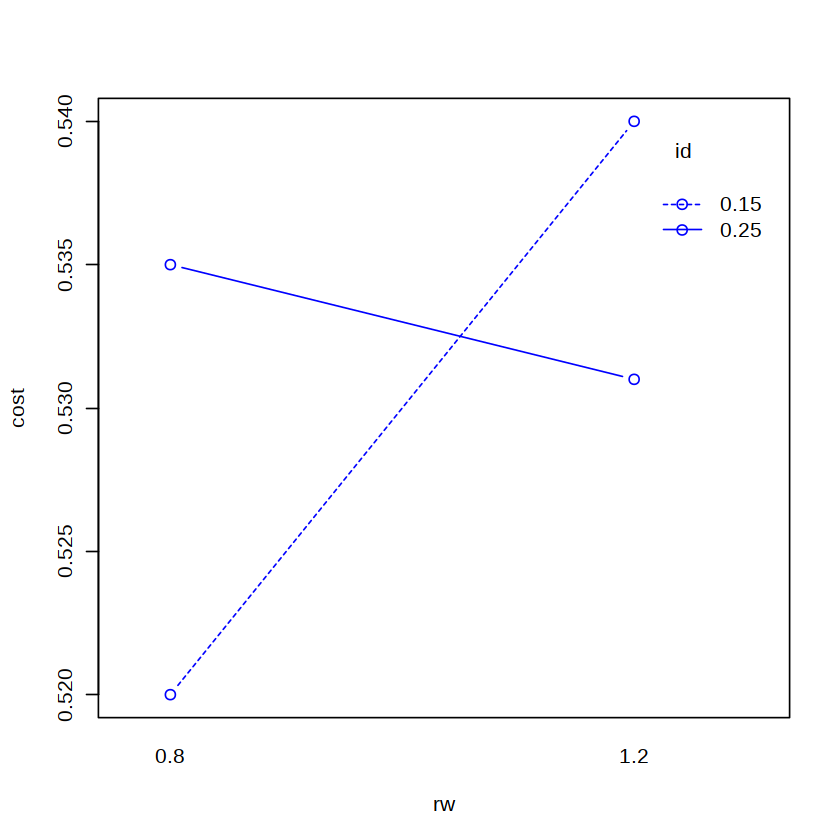

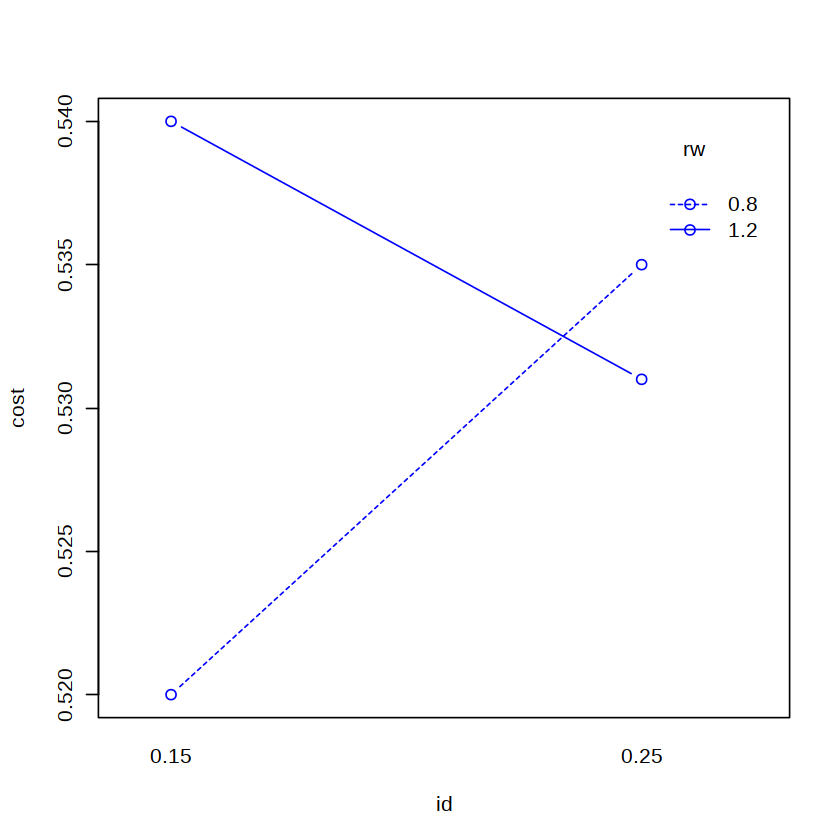

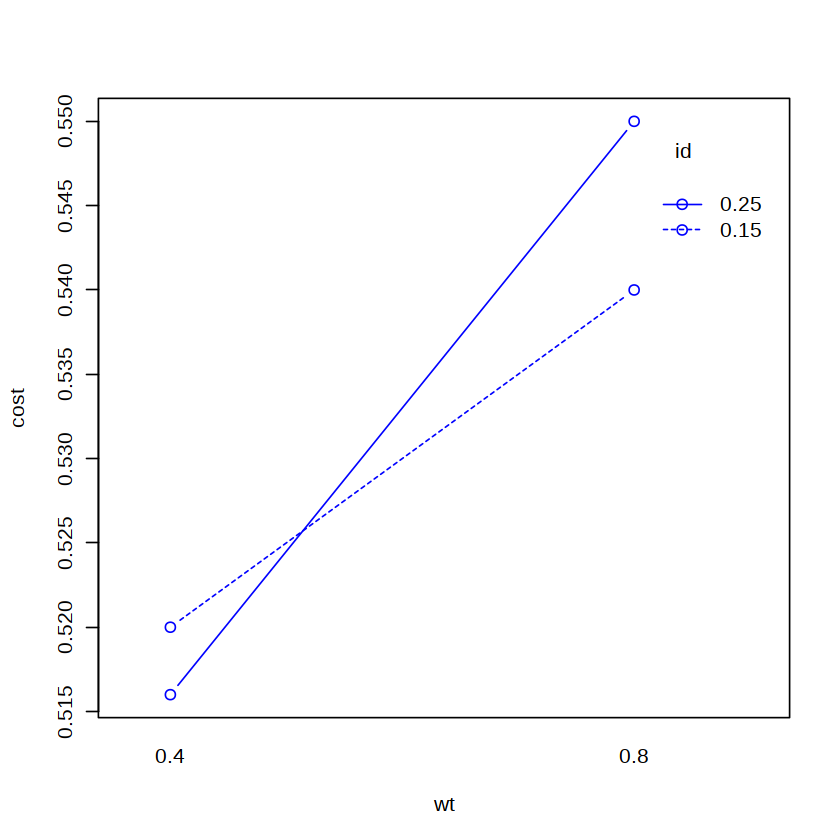

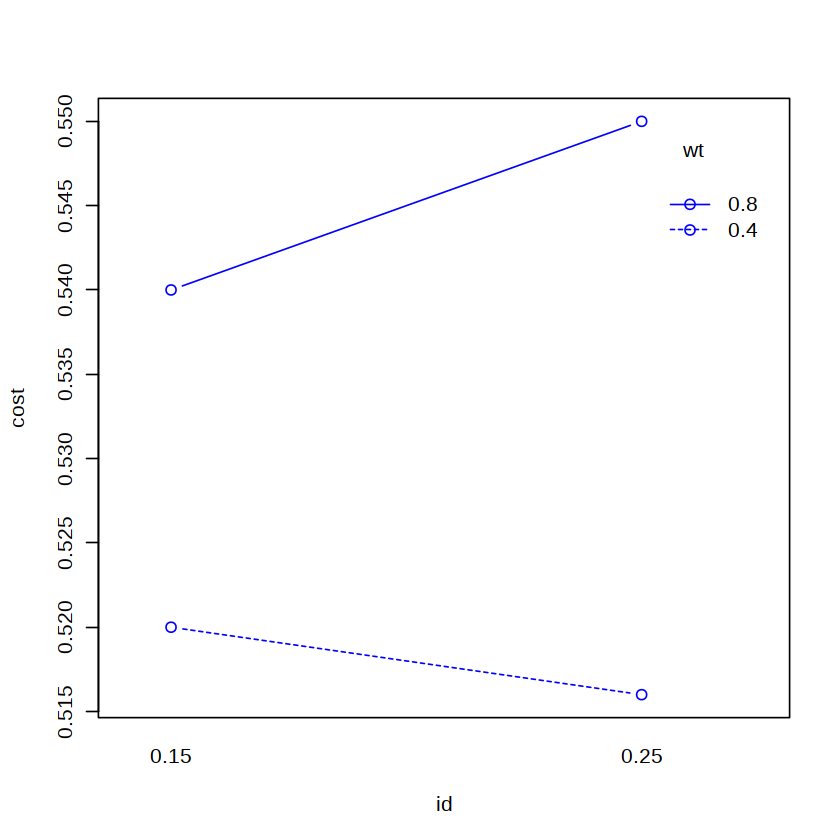

In [15]:
interaction.plot(df.cost$arw, df.cost$aid, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="cost", trace.lab="id")

interaction.plot(df.cost$aid, df.cost$arw, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="cost", xlab="id")

interaction.plot(df.cost$awt, df.cost$aid, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="id")

interaction.plot(df.cost$aid, df.cost$awt, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="id")

### Interactions: Raster Width (rw)

### rw vs wt

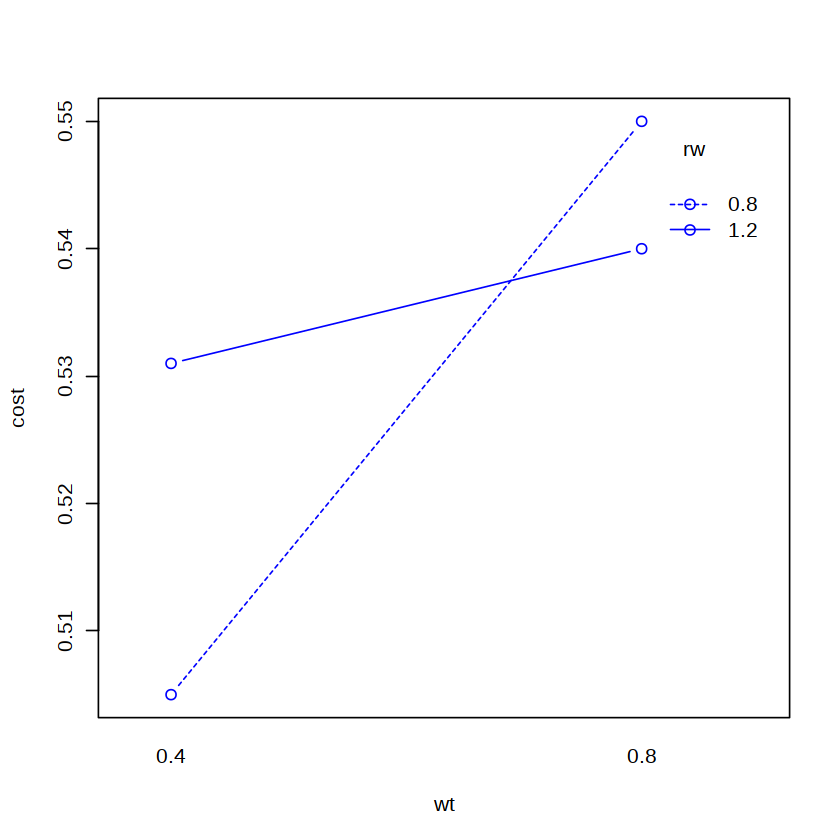

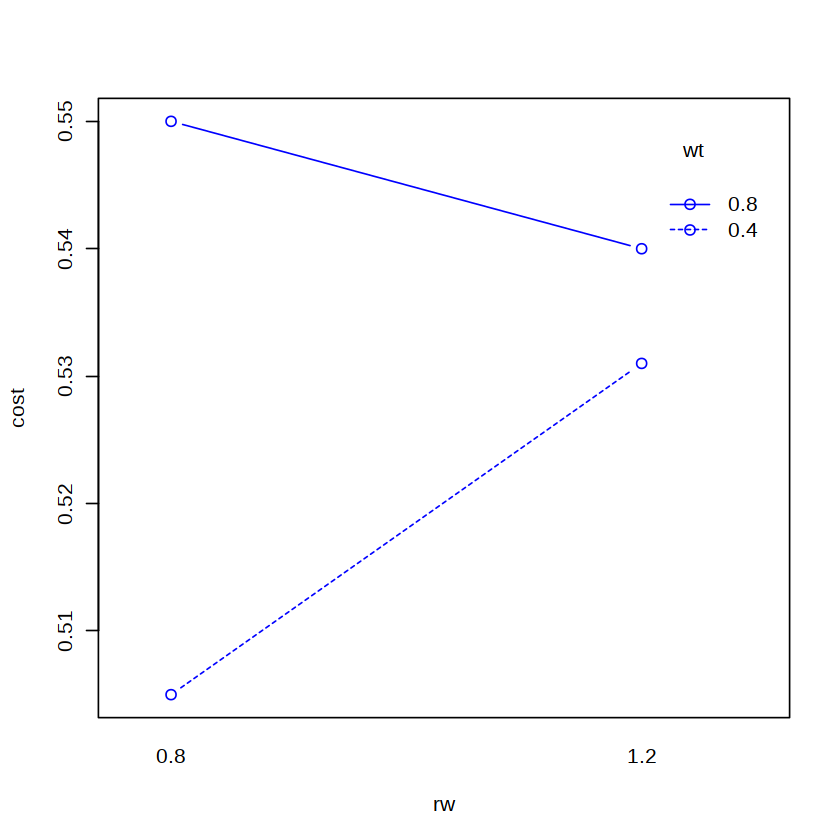

In [16]:
interaction.plot(df.cost$awt, df.cost$arw, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="rw")

interaction.plot(df.cost$arw, df.cost$awt, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="rw")

# Cost Response Surface Models

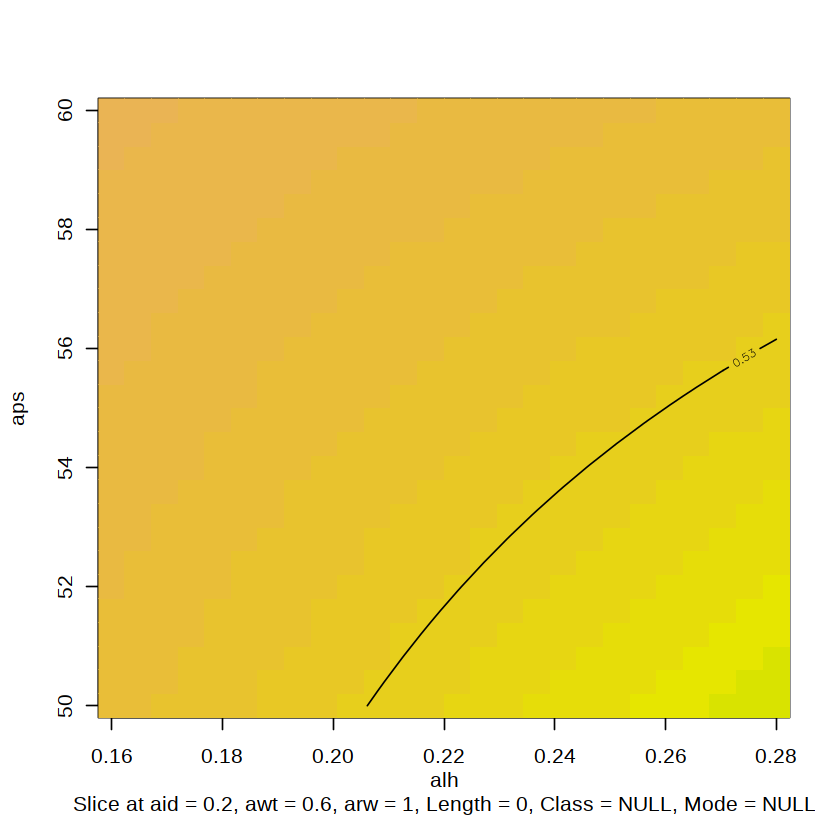

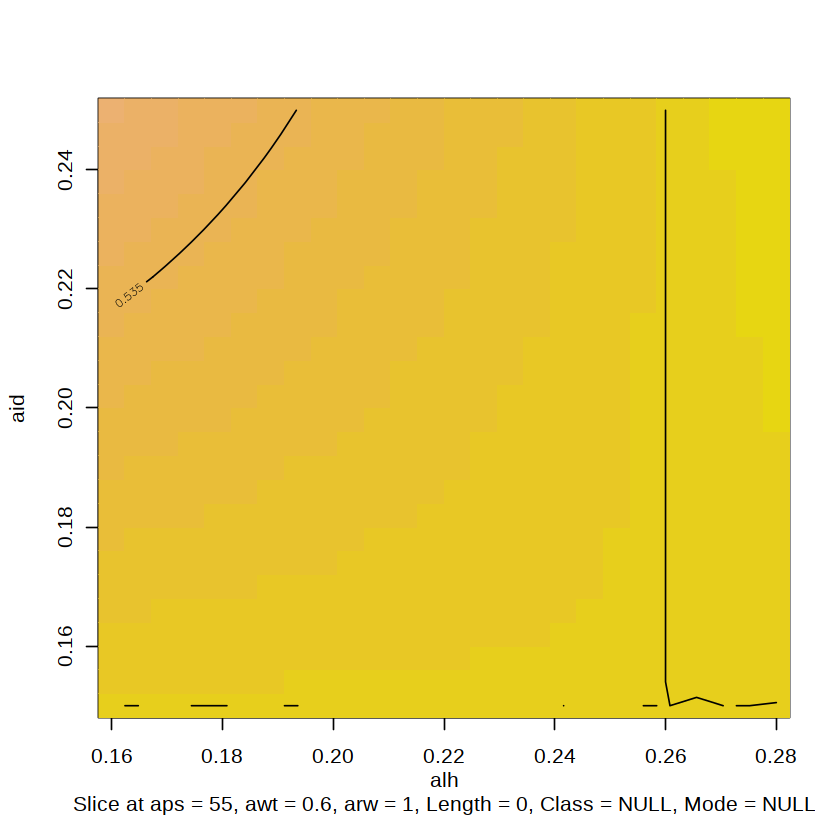

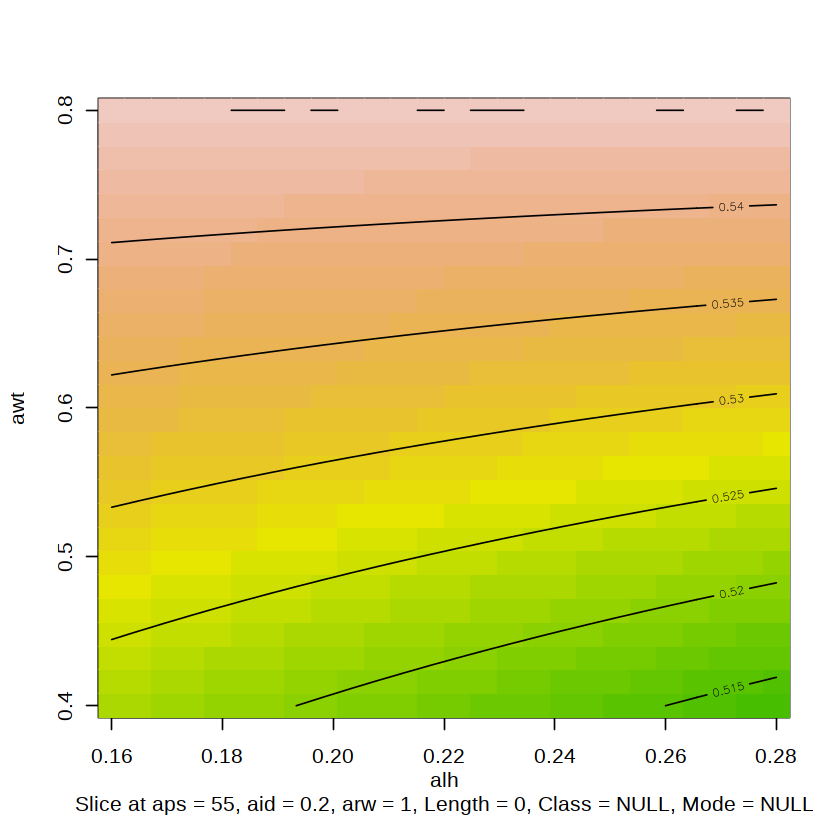

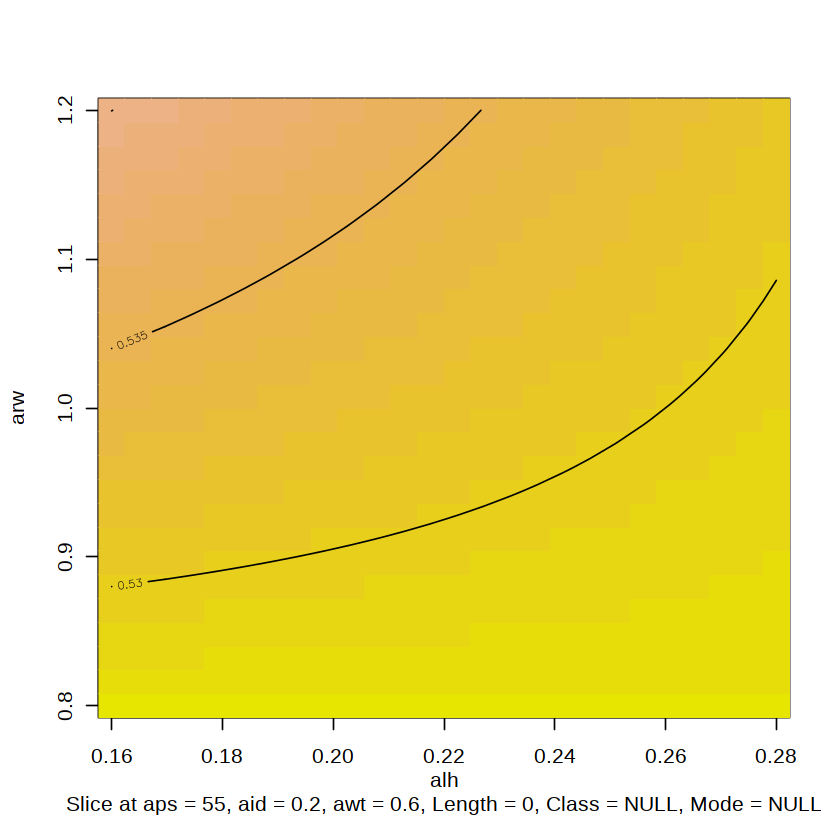

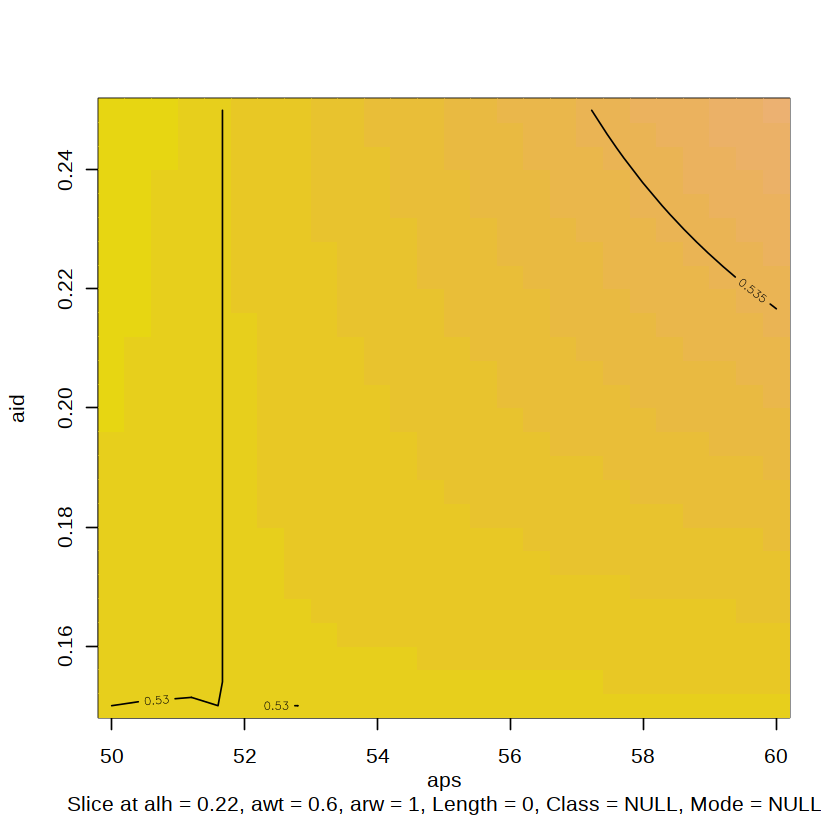

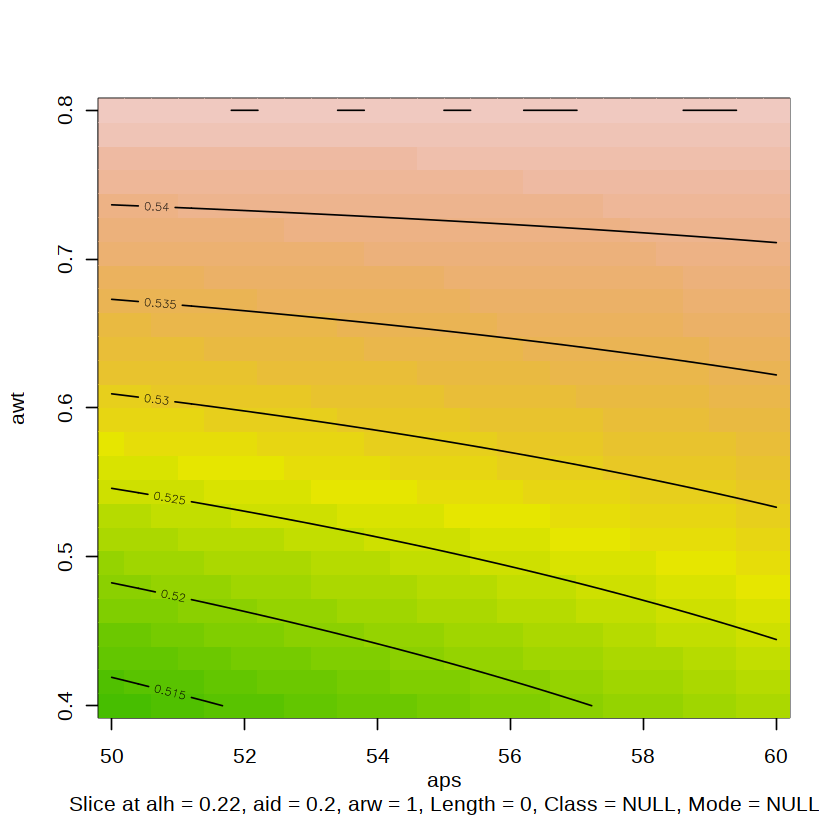

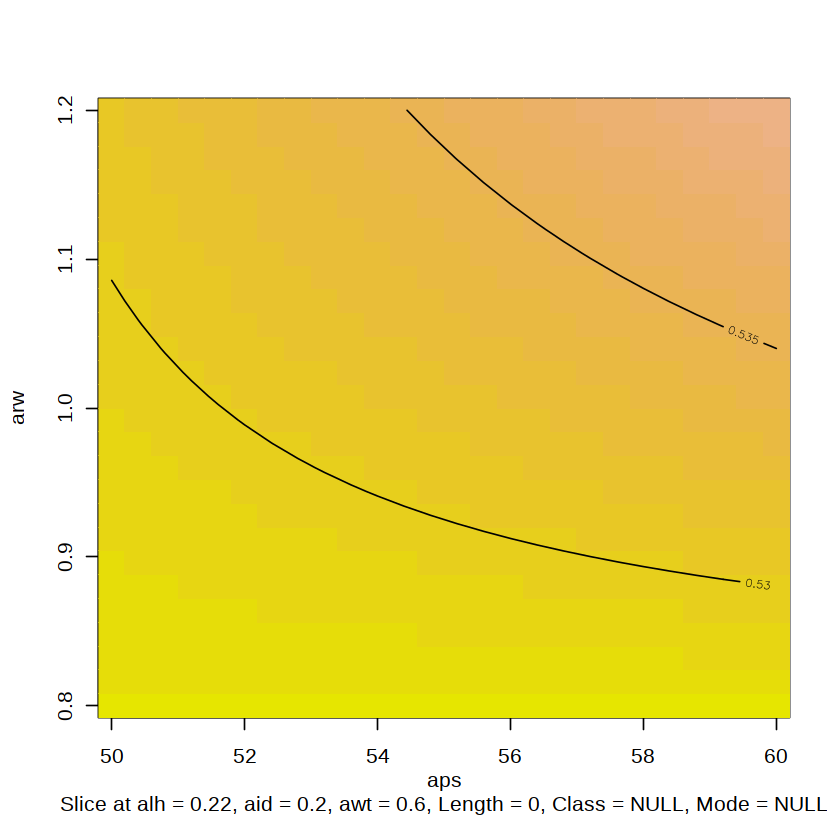

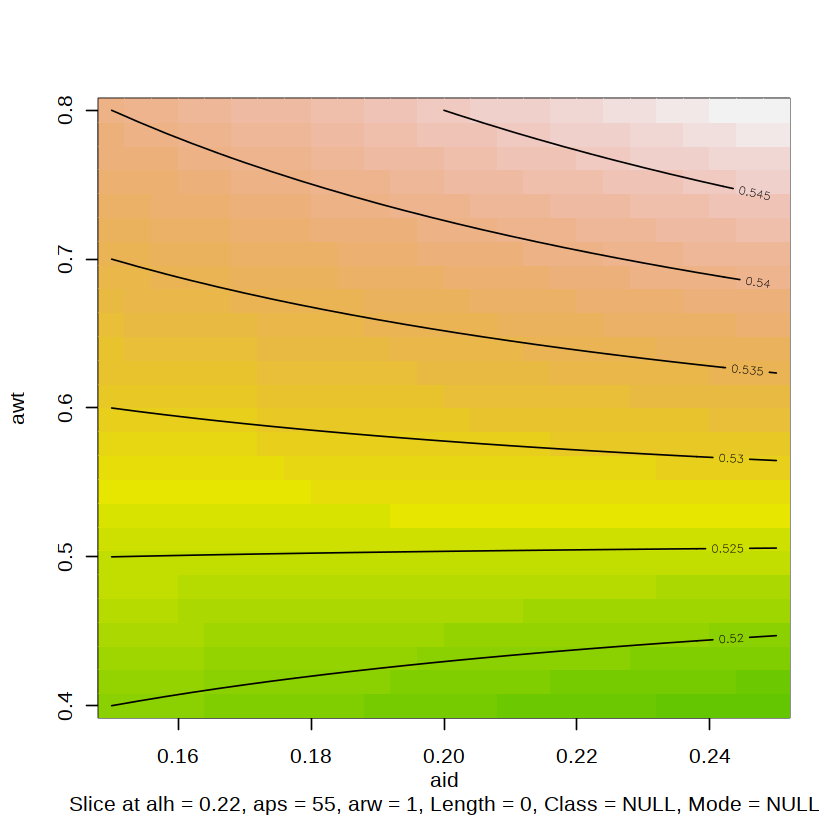

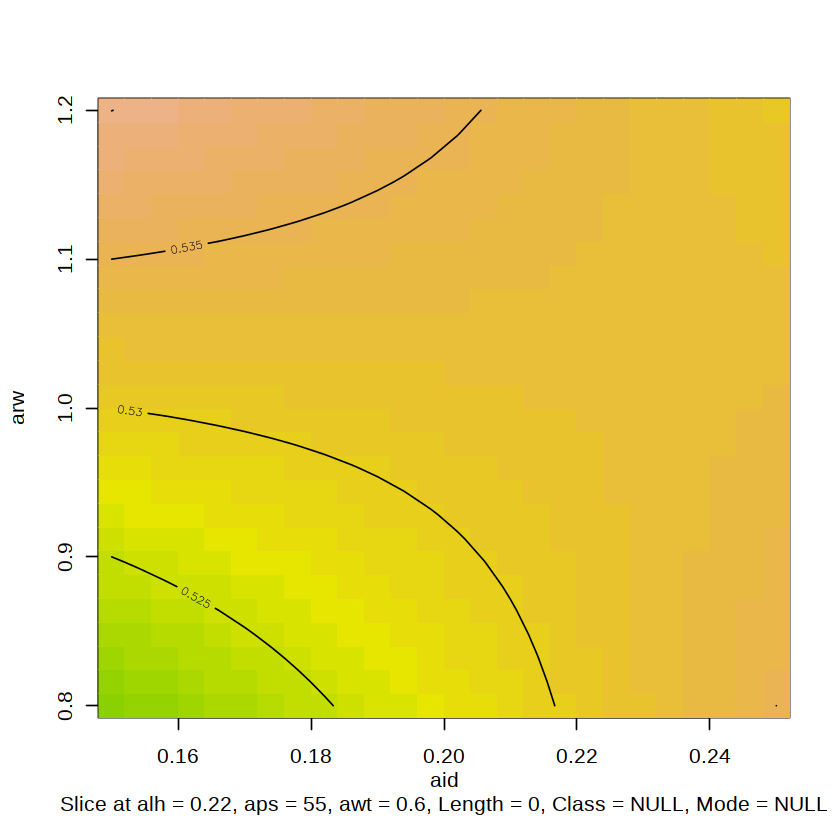

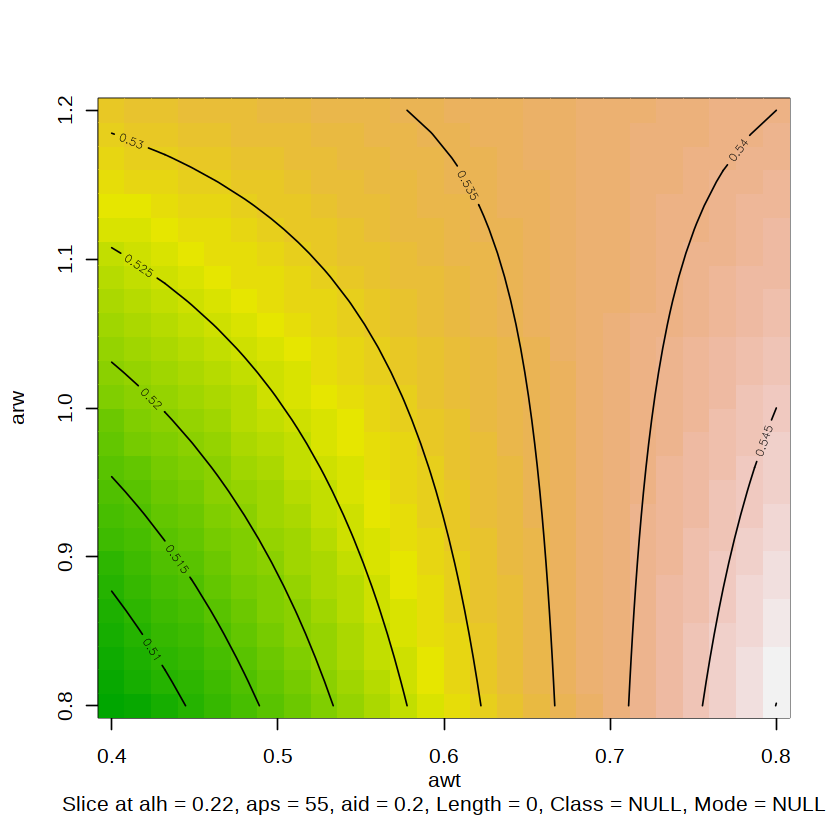

In [17]:
#contour plots 
par(mfrow=c(1,1))
suppressWarnings(
    contour(cost_rsm, ~alh + aps + aid + awt + arw, image=TRUE, at=summary(cost_rsm$canoncial$xs))
    )


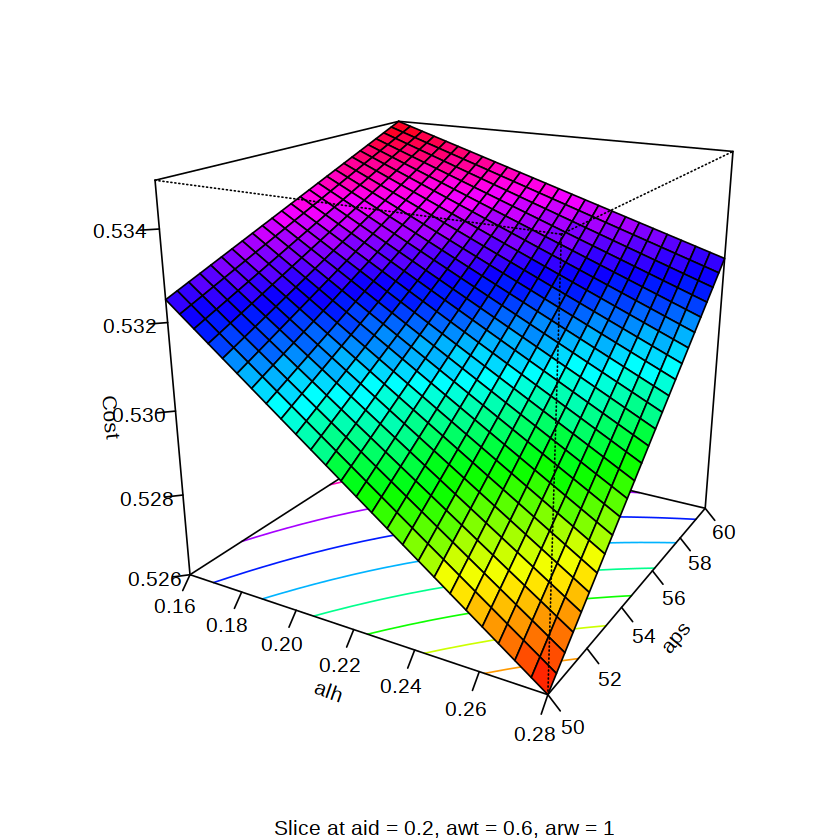

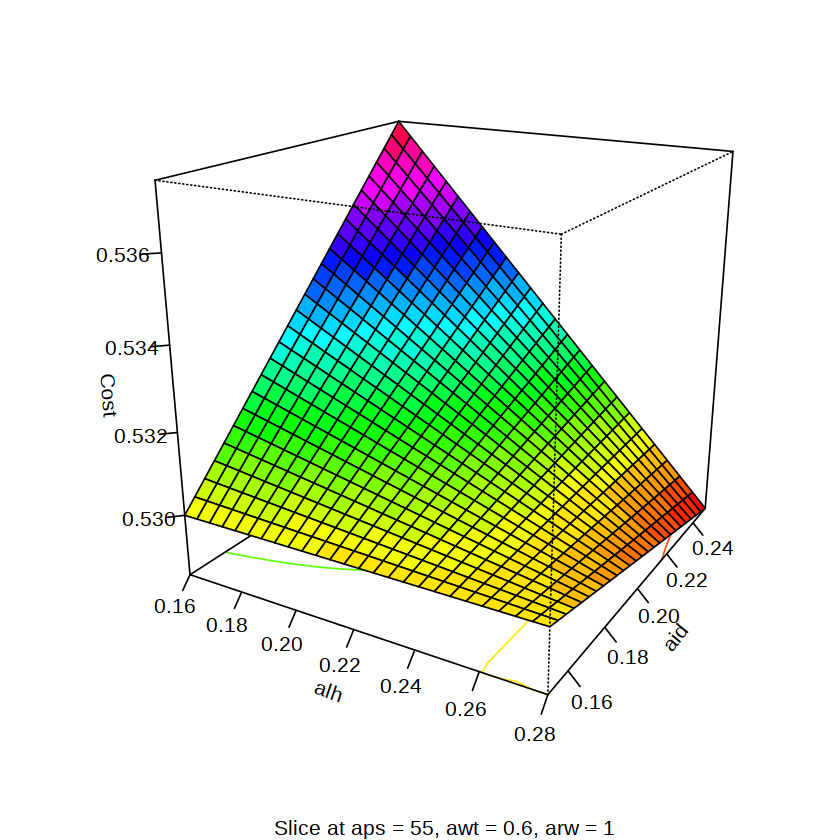

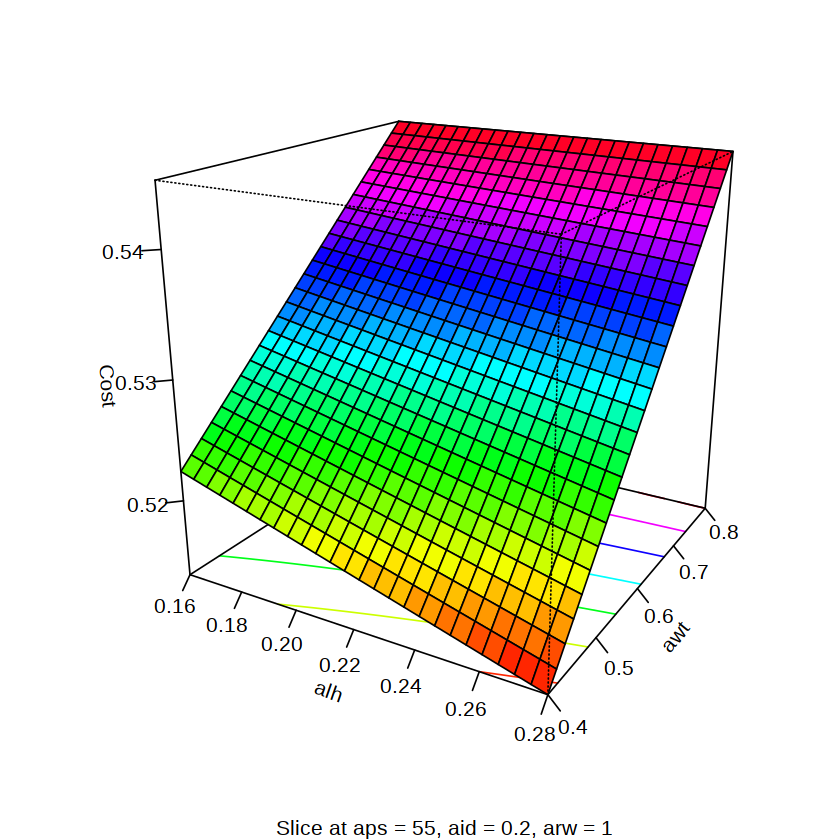

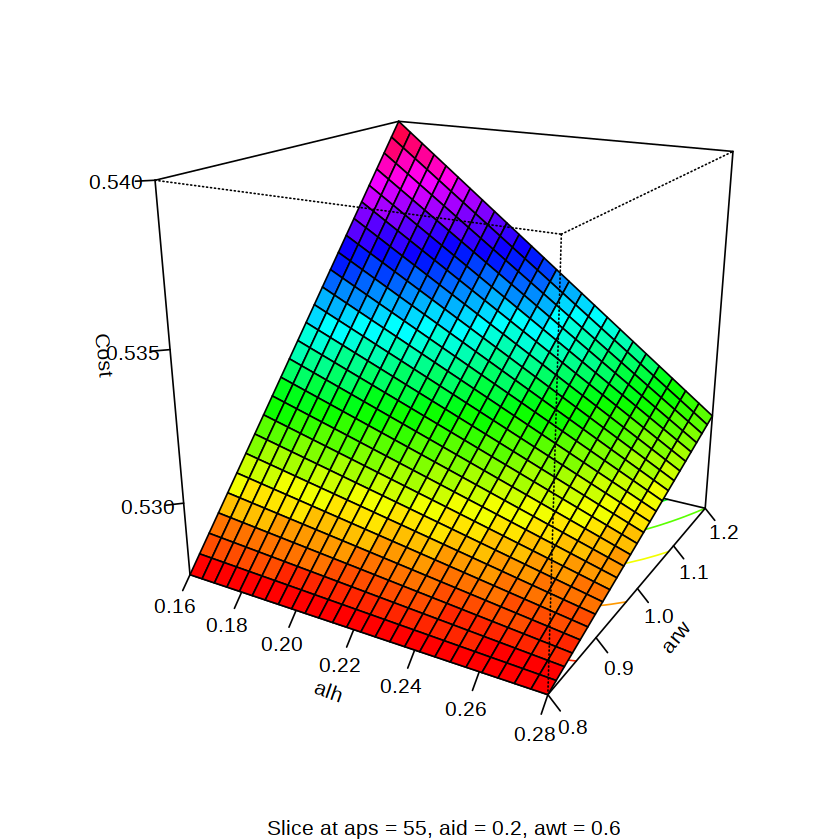

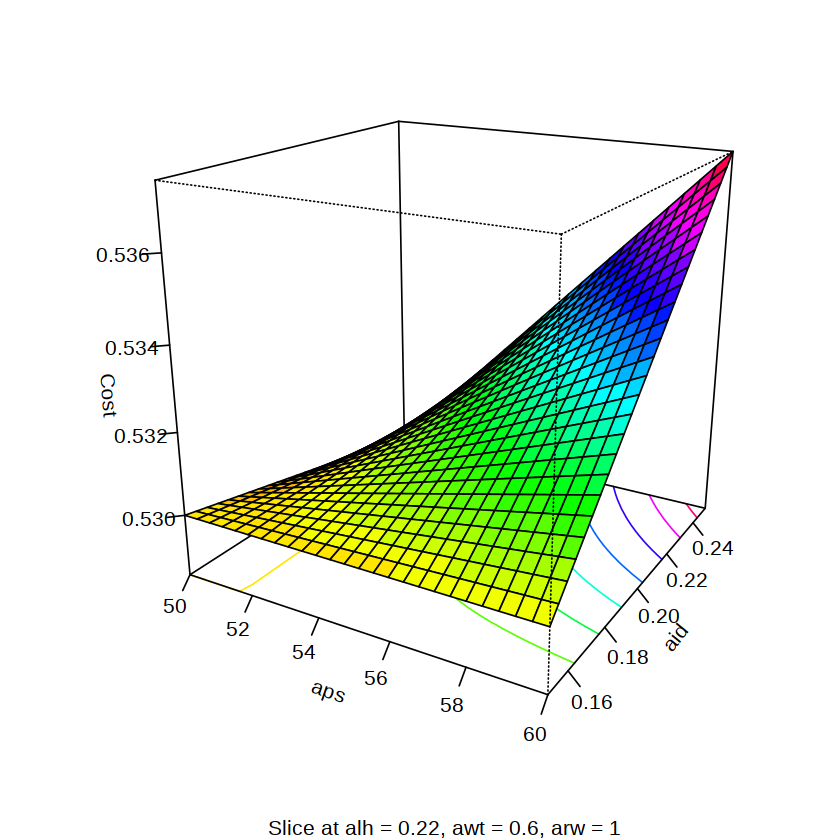

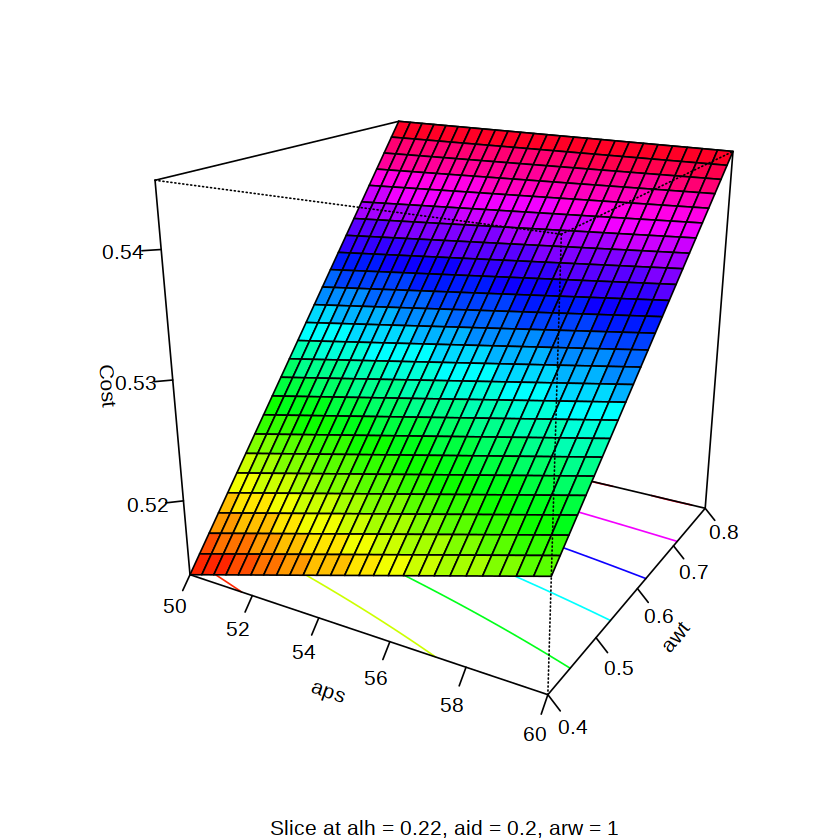

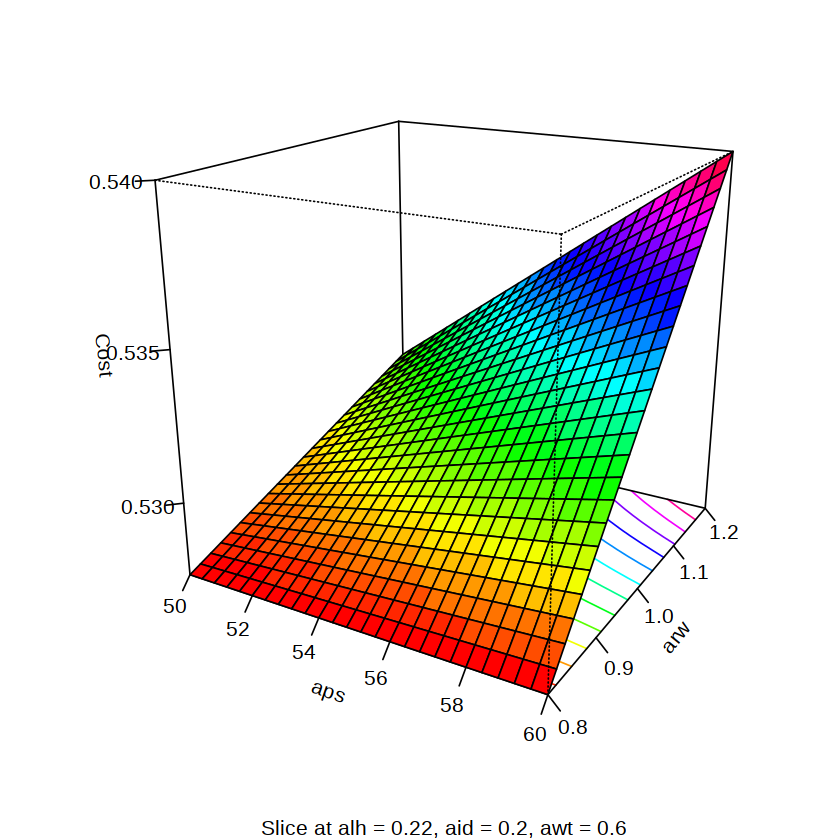

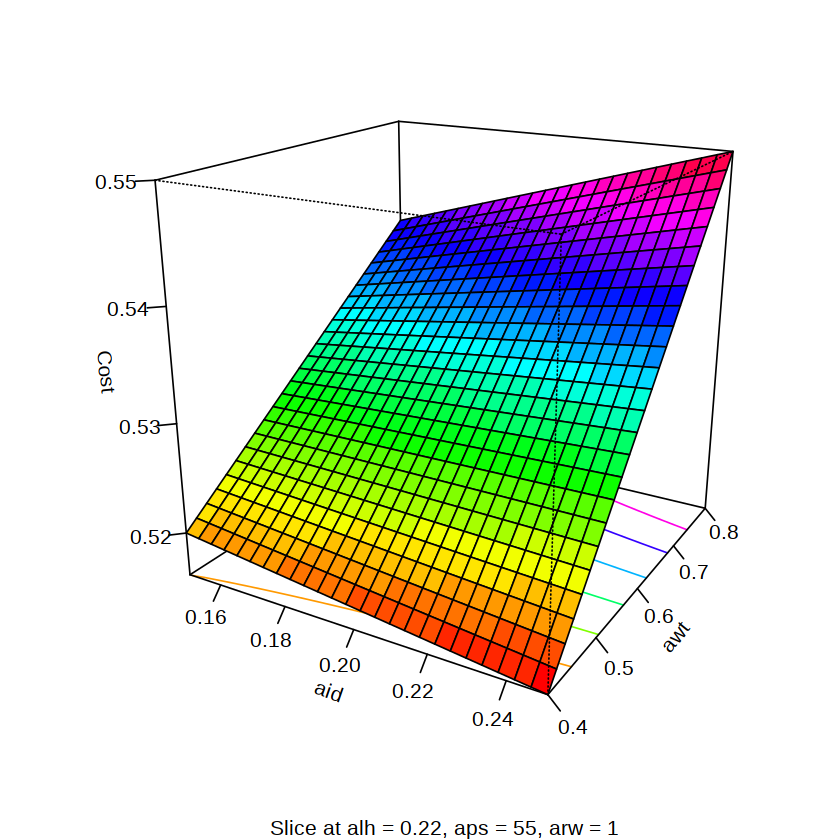

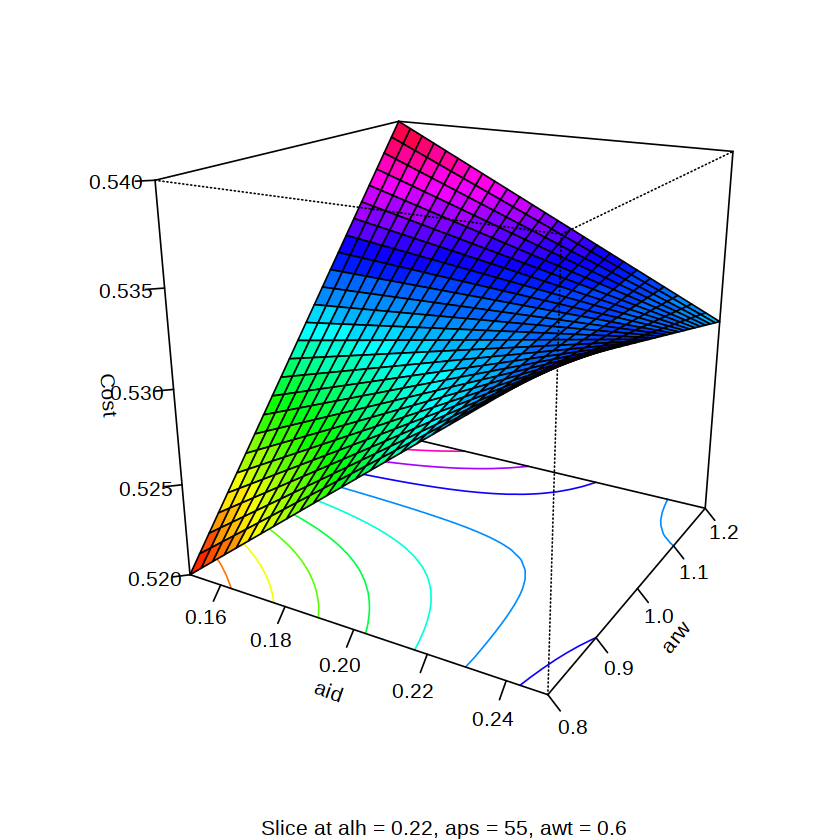

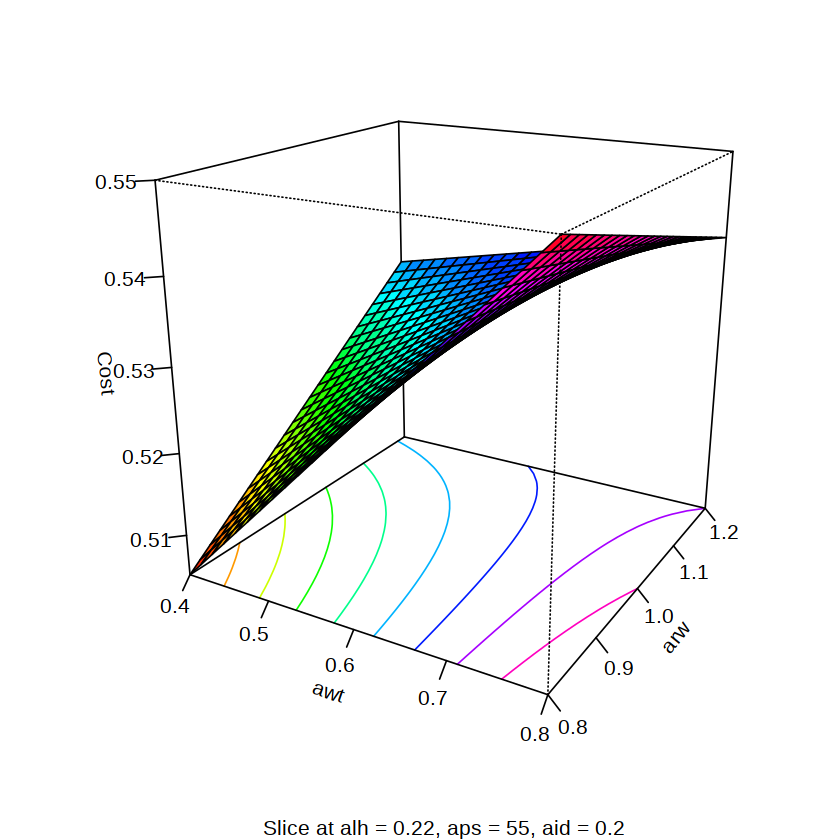

In [18]:
# Generate plots taking two factors at a time

par(mfrow=c(1,1))

suppressWarnings(
    persp(cost_rsm,~alh+aps,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~alh+aid,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~alh+awt,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~alh+arw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~aps+aid,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~aps+awt,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~aps+arw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~aid+awt,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~aid+arw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~awt+arw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )

## Time

In [19]:
df <- read.table(fn.data.time, header=TRUE)
str(df)

'data.frame':	16 obs. of  15 variables:
 $ lh   : int  -1 1 -1 1 -1 1 -1 1 -1 1 ...
 $ ps   : int  -1 -1 1 1 -1 -1 1 1 -1 -1 ...
 $ id   : int  -1 -1 -1 -1 1 1 1 1 -1 -1 ...
 $ wt   : int  -1 -1 -1 -1 -1 -1 -1 -1 1 1 ...
 $ rw   : int  1 -1 -1 1 -1 1 1 -1 -1 1 ...
 $ alh  : num  0.16 0.28 0.16 0.28 0.16 0.28 0.16 0.28 0.16 0.28 ...
 $ aps  : int  50 50 60 60 50 50 60 60 50 50 ...
 $ aid  : num  0.25 0.25 0.25 0.25 0.15 0.15 0.15 0.15 0.25 0.25 ...
 $ awt  : num  0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.8 0.8 ...
 $ arw  : num  0.8 1.2 1.2 0.8 1.2 0.8 0.8 1.2 1.2 0.8 ...
 $ time1: int  8741 18098 14493 10191 14914 10423 16648 8534 15085 10624 ...
 $ time2: int  8743 18042 14469 10185 14873 10199 16652 10149 15111 10624 ...
 $ time3: int  8777 17930 14478 10199 15060 10345 16658 8492 15108 10644 ...
 $ time4: int  8733 18026 14448 10118 15063 10421 16653 8480 15115 10646 ...
 $ time5: int  8736 17634 14360 10200 15026 10422 16565 8538 15122 10579 ...


In [20]:
# reshape data into long format
df.time <- melt(df, id.vars = c("lh", "ps", "id", "wt", "rw", "alh", "aps", "aid", "awt", "arw"), variable.name = "rep", value.name = "time")

In [21]:
# Summary of the original data

summary(df.time)

       lh           ps           id           wt           rw    
 Min.   :-1   Min.   :-1   Min.   :-1   Min.   :-1   Min.   :-1  
 1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1  
 Median : 0   Median : 0   Median : 0   Median : 0   Median : 0  
 Mean   : 0   Mean   : 0   Mean   : 0   Mean   : 0   Mean   : 0  
 3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1  
 Max.   : 1   Max.   : 1   Max.   : 1   Max.   : 1   Max.   : 1  
      alh            aps          aid            awt           arw     
 Min.   :0.16   Min.   :50   Min.   :0.15   Min.   :0.4   Min.   :0.8  
 1st Qu.:0.16   1st Qu.:50   1st Qu.:0.15   1st Qu.:0.4   1st Qu.:0.8  
 Median :0.22   Median :55   Median :0.20   Median :0.6   Median :1.0  
 Mean   :0.22   Mean   :55   Mean   :0.20   Mean   :0.6   Mean   :1.0  
 3rd Qu.:0.28   3rd Qu.:60   3rd Qu.:0.25   3rd Qu.:0.8   3rd Qu.:1.2  
 Max.   :0.28   Max.   :60   Max.   :0.25   Max.   :0.8   Max.   :1.2  
    rep          time      
 time1

In [22]:
time_rsm <- rsm(time ~ SO(alh, aps, aid, awt, arw), data = df.time)

Warning message in rsm(time ~ SO(alh, aps, aid, awt, arw), data = df.time):
“Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object.”


In [23]:
# externally Studentized residuals
time_rsm$studres <- rstudent(time_rsm)
summary(time_rsm)


Call:
rsm(formula = time ~ SO(alh, aps, aid, awt, arw), data = df.time)

Residuals:
    Min      1Q  Median      3Q     Max 
-6370.6   -86.3    -0.7    27.6 25359.4 

Coefficients: (5 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -95522.2    38534.3  -2.479 0.015825 *  
FO(alh, aps, aid, awt, arw)alh       208852.5    87325.0   2.392 0.019721 *  
FO(alh, aps, aid, awt, arw)aps         2111.7      641.4   3.292 0.001621 ** 
FO(alh, aps, aid, awt, arw)aid      -213627.2   104008.6  -2.054 0.044071 *  
FO(alh, aps, aid, awt, arw)awt        39419.8    26533.8   1.486 0.142283    
FO(alh, aps, aid, awt, arw)arw        80131.6    25302.2   3.167 0.002360 ** 
TWI(alh, aps, aid, awt, arw)alh:aps   -5032.1     1331.7  -3.779 0.000348 ***
TWI(alh, aps, aid, awt, arw)alh:aid  216391.7   133169.3   1.625 0.109091    
TWI(alh, aps, aid, awt, arw)alh:awt -123279.2    33292.3  -3.703 0.000446 *

In [24]:
## generate ANOVA table for selected model
anova(time_rsm)

Df Sum Sq    Mean Sq  F value  Pr(>F)      
FO(alh, aps, aid, awt, arw)   5 497491477 99498295 7.792465 8.912666e-06
TWI(alh, aps, aid, awt, arw) 10 841882988 84188299 6.593423 6.349411e-07
Residuals                    64 817185688 12768526       NA           NA

In [25]:
lm_time3lvl <- lm(time ~ (alh+ aps+ aid+ awt+ arw)^3, data = df.time)
# externally Studentized residuals
lm_time3lvl$studres <- rstudent(lm_time3lvl)
summary(lm_time3lvl)


Call:
lm(formula = time ~ (alh + aps + aid + awt + arw)^3, data = df.time)

Residuals:
    Min      1Q  Median      3Q     Max 
-6370.6   -86.3    -0.7    27.6 25359.4 

Coefficients: (10 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -95522.2    38534.3  -2.479 0.015825 *  
alh          208852.5    87325.0   2.392 0.019721 *  
aps            2111.7      641.4   3.292 0.001621 ** 
aid         -213627.2   104008.6  -2.054 0.044071 *  
awt           39419.8    26533.8   1.486 0.142283    
arw           80131.6    25302.2   3.167 0.002360 ** 
alh:aps       -5032.1     1331.7  -3.779 0.000348 ***
alh:aid      216391.7   133169.3   1.625 0.109091    
alh:awt     -123279.2    33292.3  -3.703 0.000446 ***
alh:arw       58335.4    33292.3   1.752 0.084526 .  
aps:aid        1705.9     1598.0   1.068 0.289756    
aps:awt         313.4      399.5   0.784 0.435734    
aps:arw       -1519.7      399.5  -3.804 0.000321 ***
aid:awt       409

## Time Interaction Plots

### Interactions: Layer Height

In [26]:
## Generate interaction plots.

par(mfrow=c(2,1), bg=rgb(1,1,0.8), mar=c(5, 8, 2, 4))

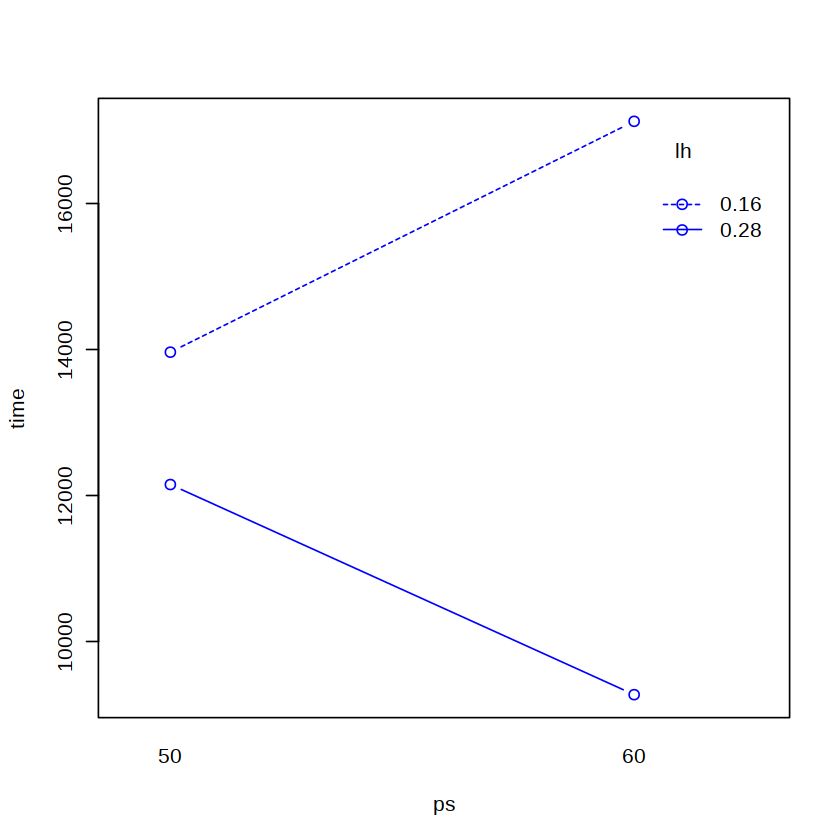

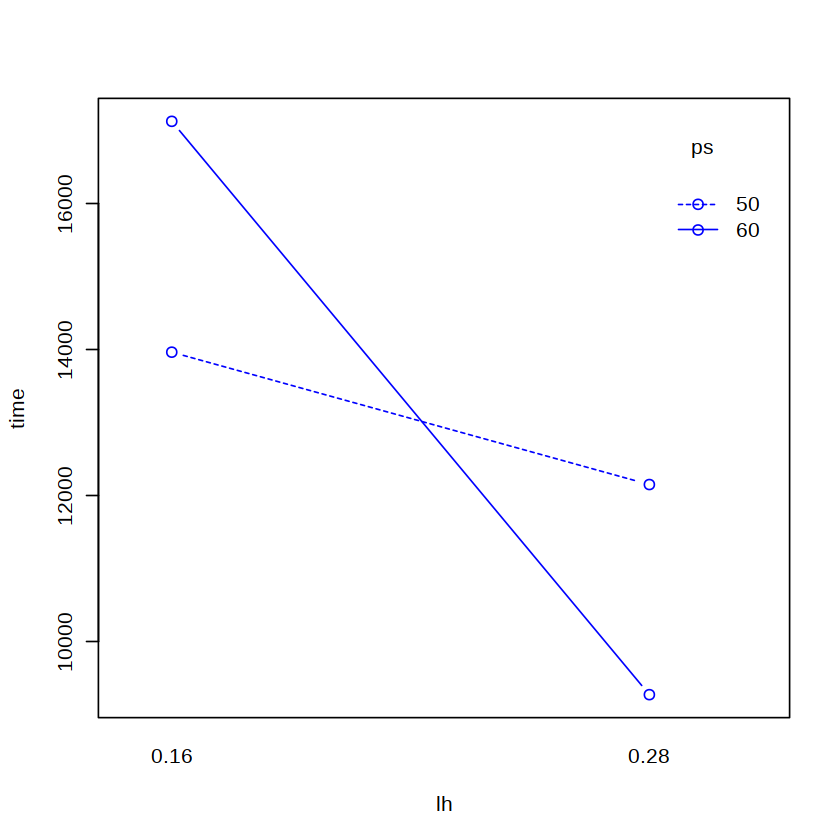

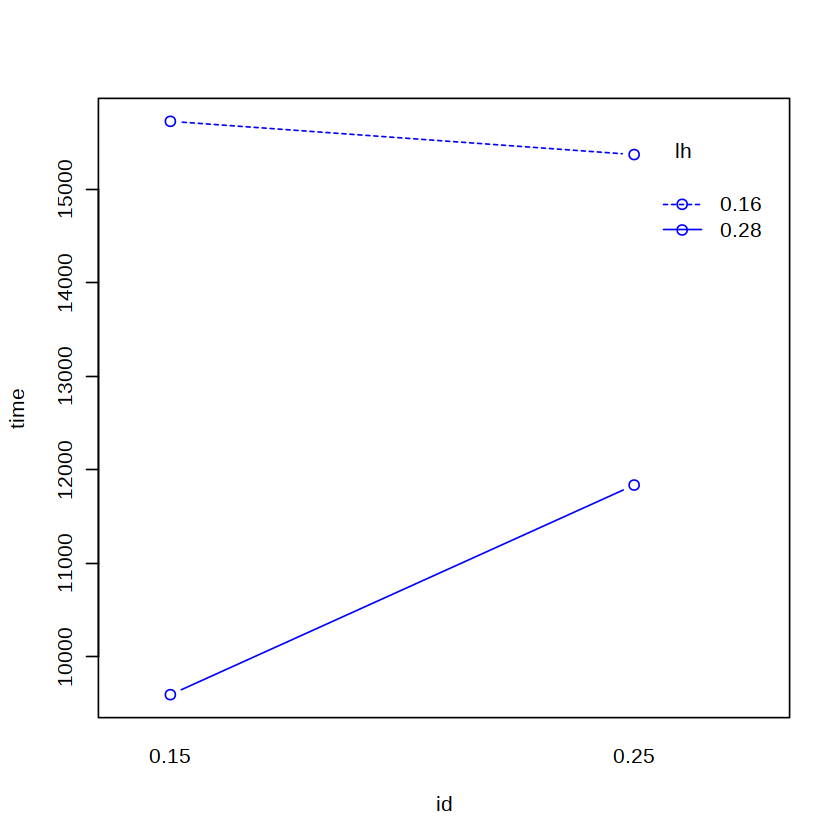

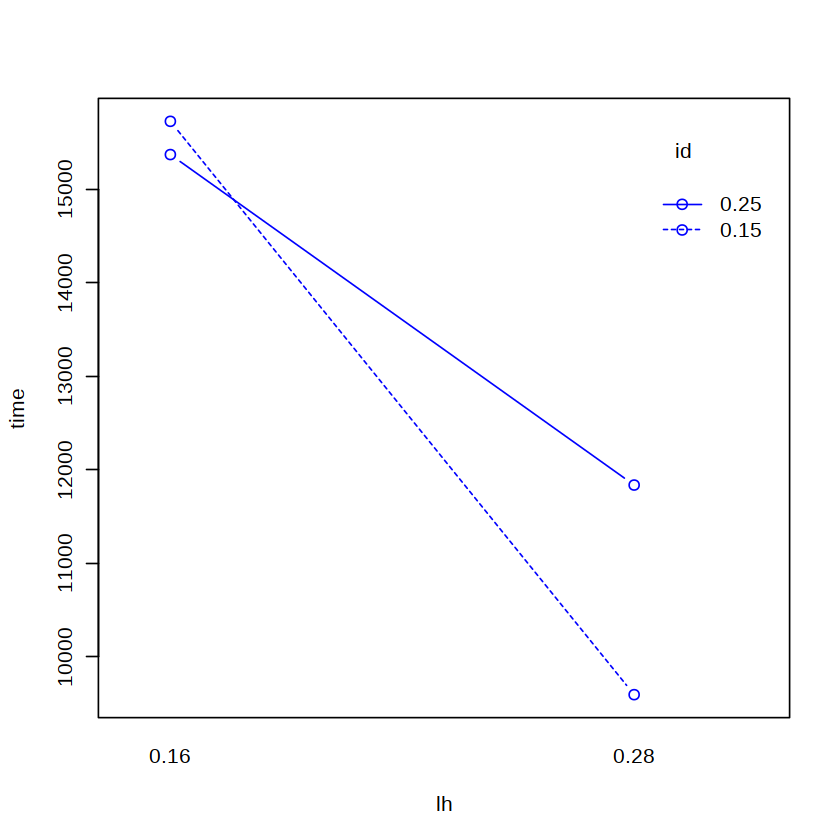

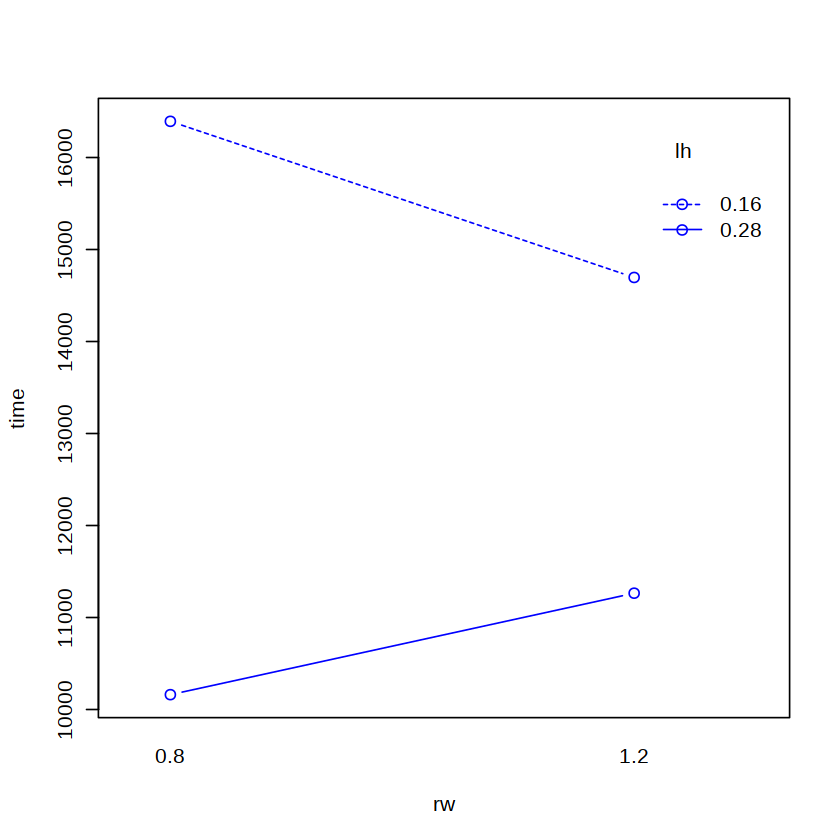

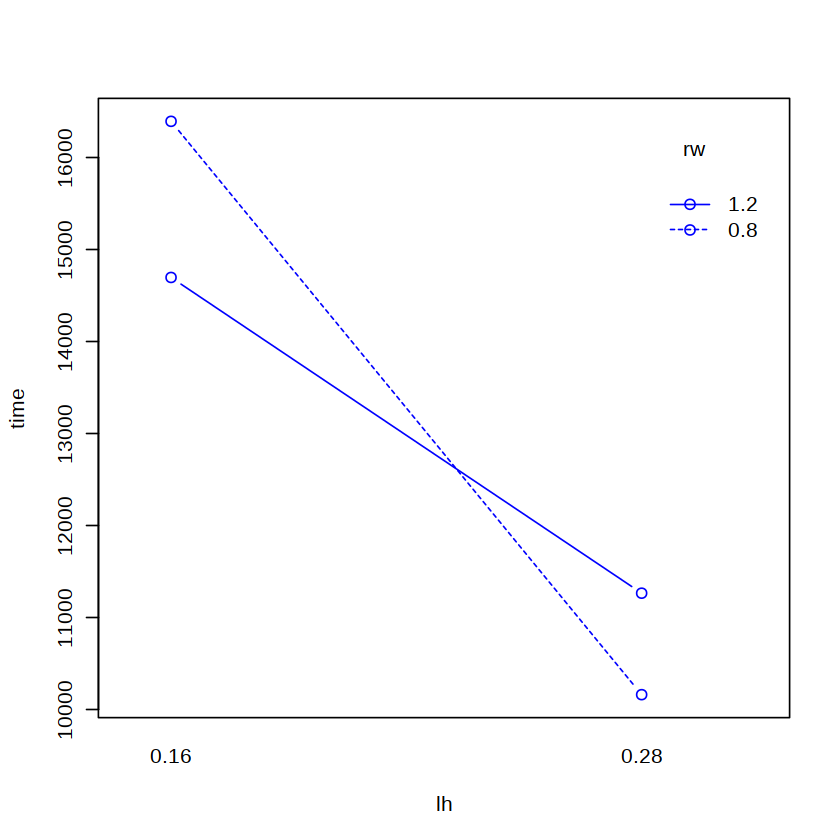

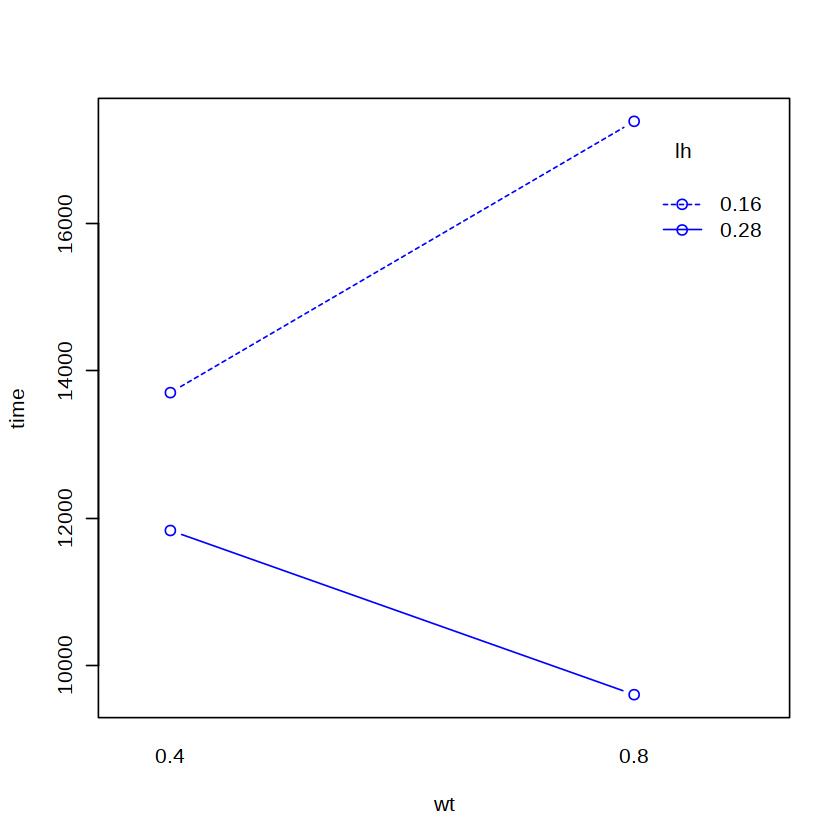

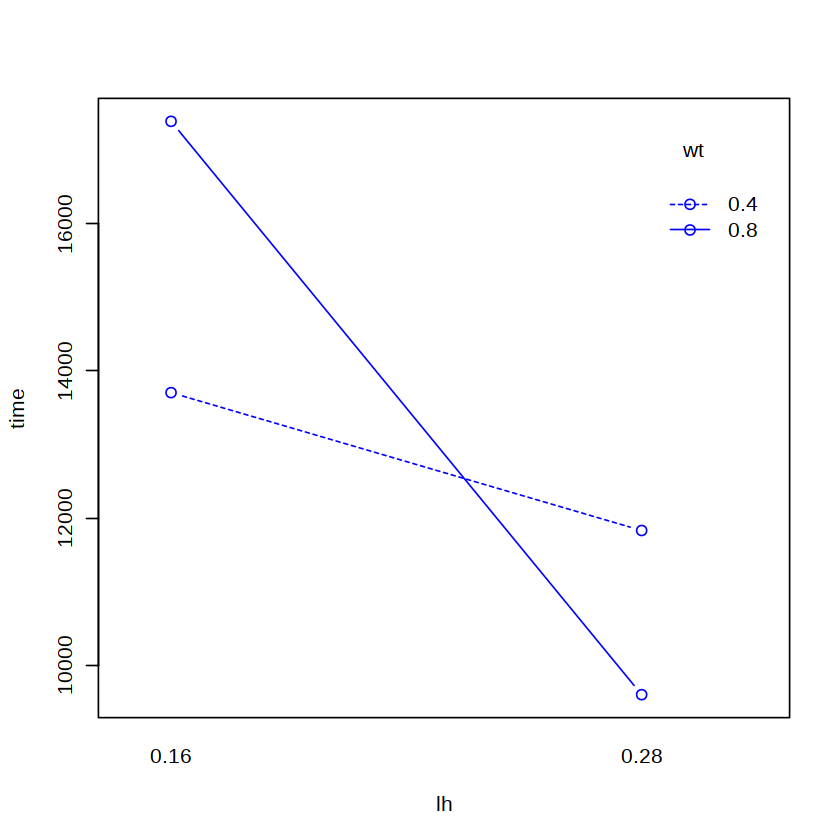

In [27]:
interaction.plot(df.time$aps, df.time$alh, df.time$time, fun=mean,type="b", pch=c(21,21), col=4,xlab="ps", ylab="time", trace.lab="lh")

interaction.plot(df.time$alh, df.time$aps, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="ps", ylab="time", xlab="lh")

interaction.plot(df.time$aid, df.time$alh, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="id", ylab="time", trace.lab="lh")

interaction.plot(df.time$alh, df.time$aid, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="id", ylab="time", xlab="lh")

interaction.plot(df.time$arw, df.time$alh, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="time", trace.lab="lh")

interaction.plot(df.time$alh, df.time$arw, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="time", xlab="lh")

interaction.plot(df.time$awt, df.time$alh, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="time", trace.lab="lh")

interaction.plot(df.time$alh, df.time$awt, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="time", xlab="lh")

In [28]:
## Interactions: Print Speed (ps)

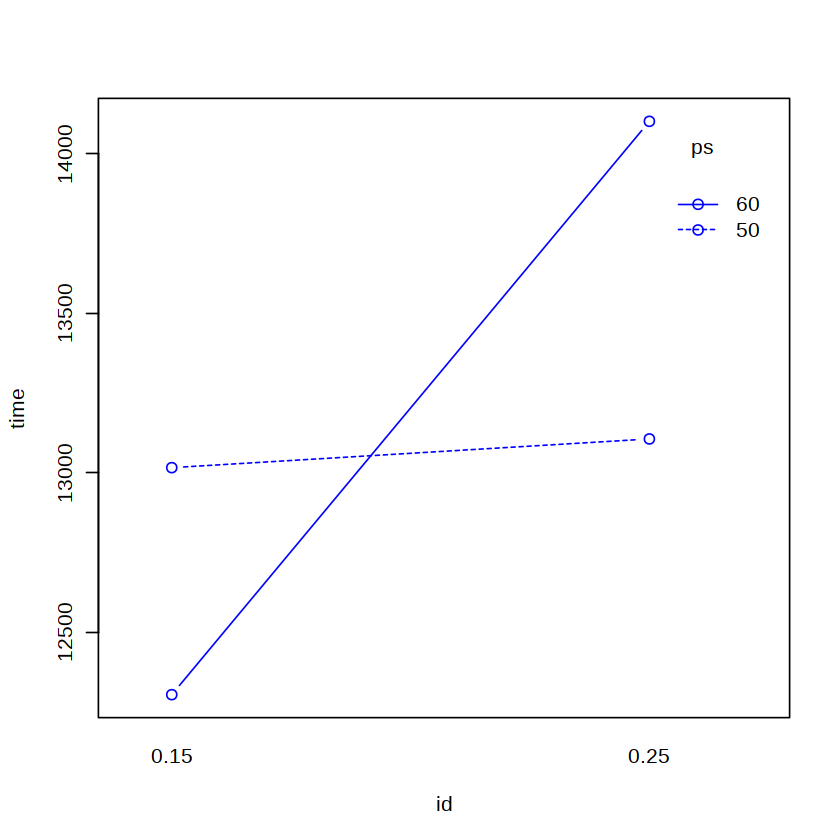

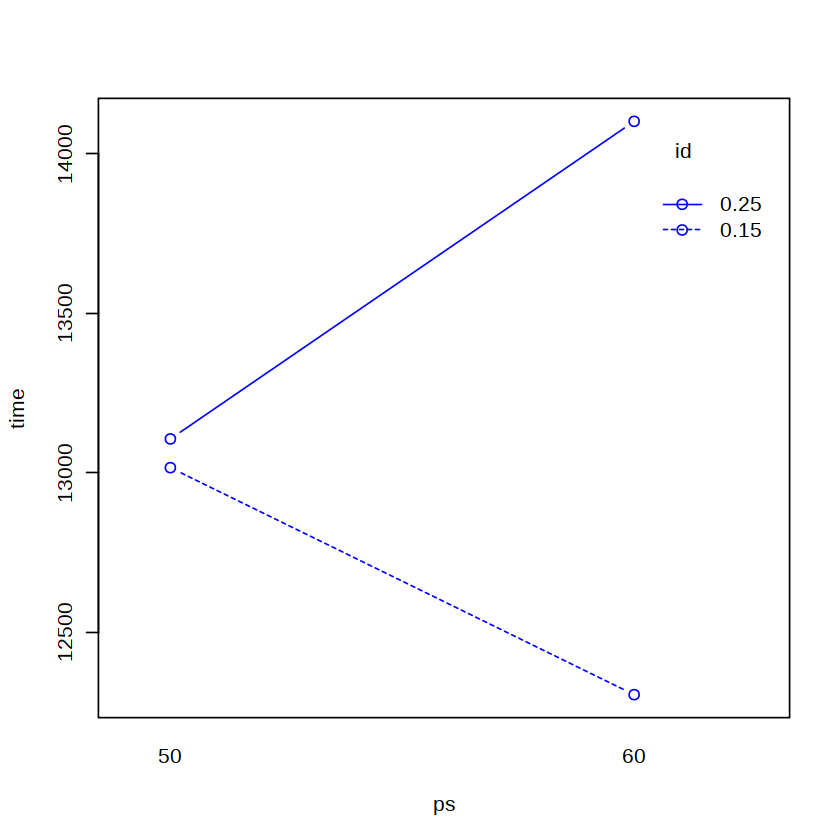

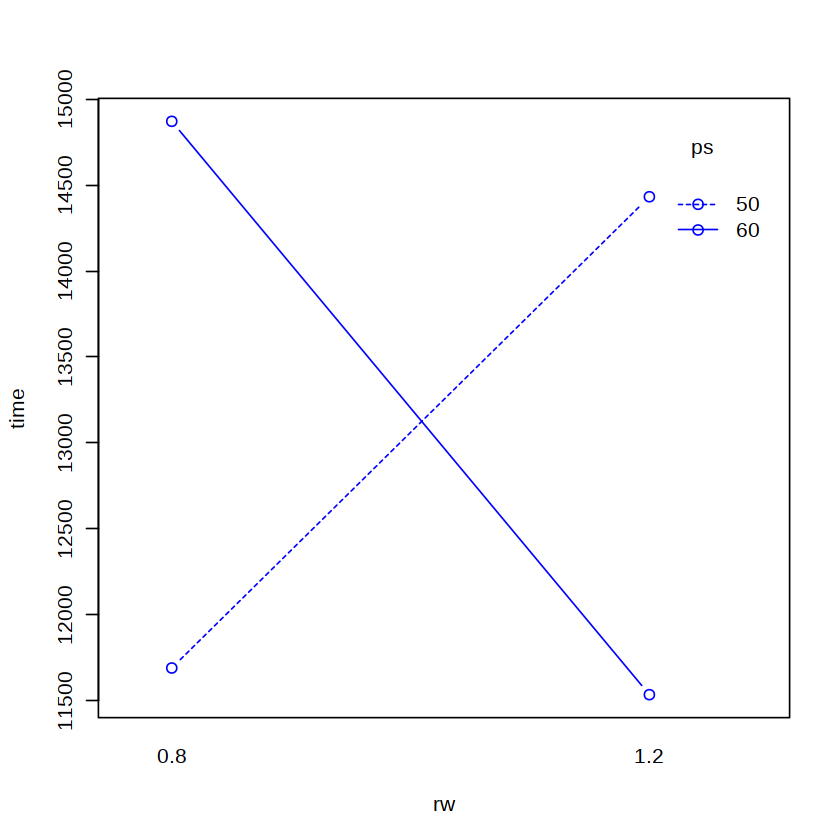

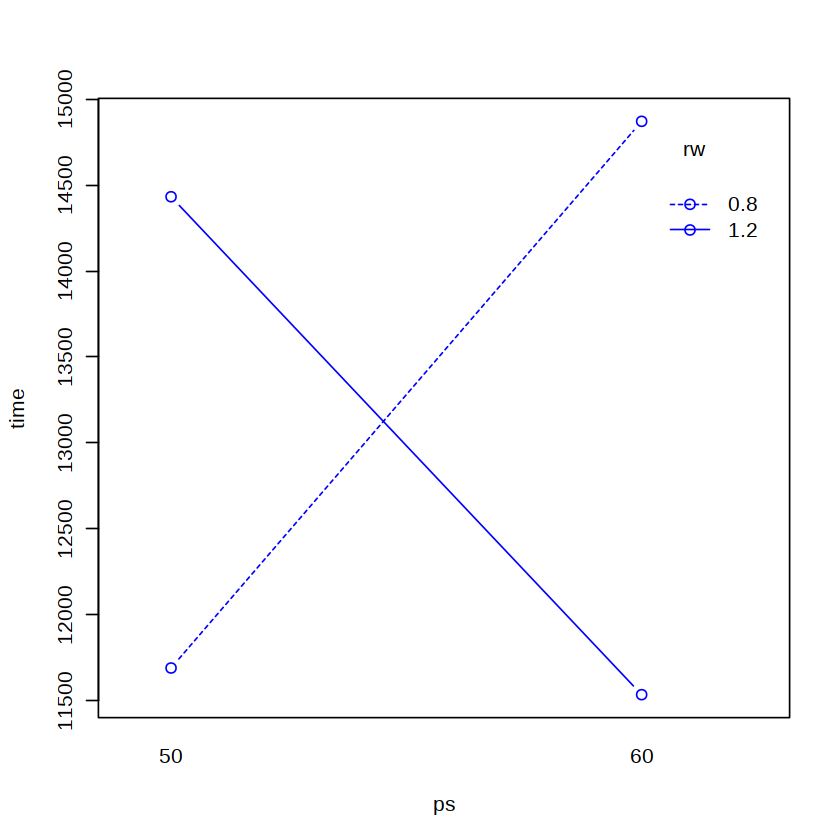

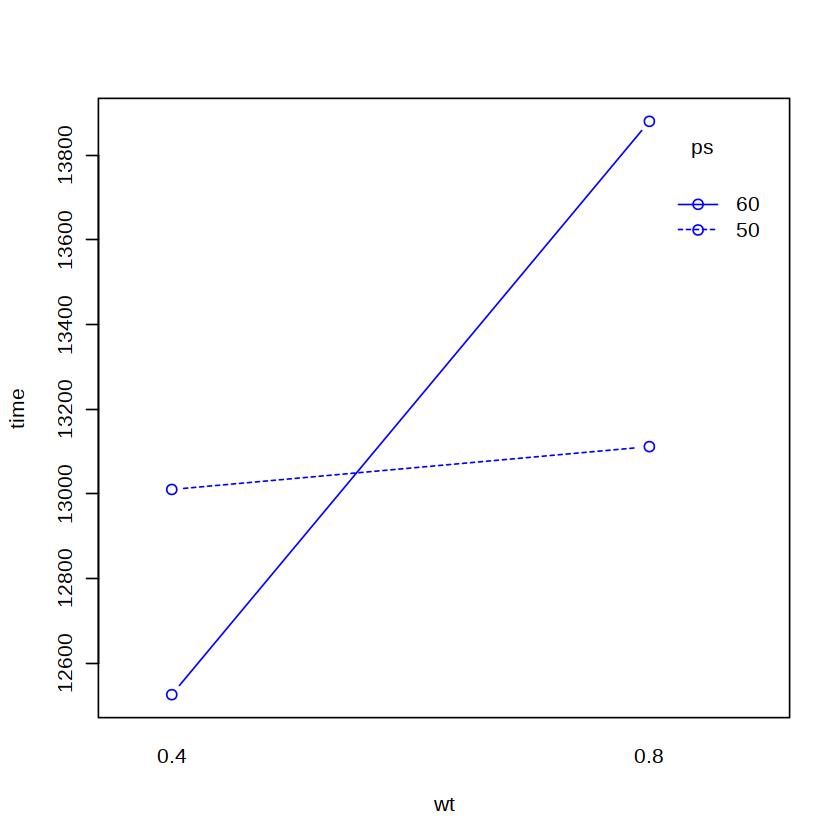

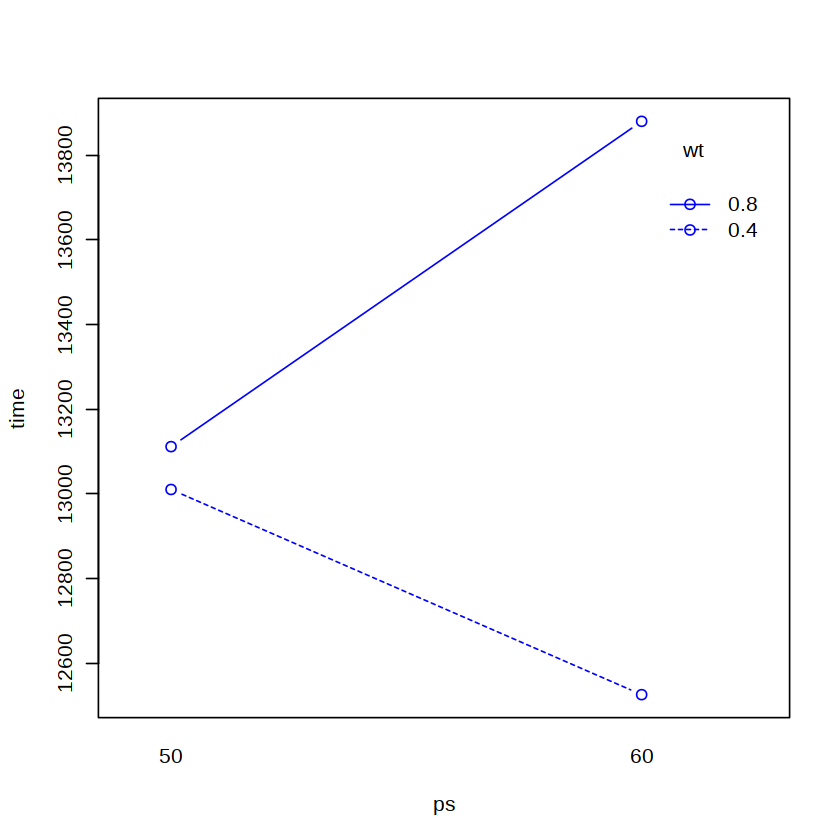

In [29]:
interaction.plot(df.time$aid, df.time$aps, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="id", ylab="time", trace.lab="ps")

interaction.plot(df.time$aps, df.time$aid, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="id", ylab="time", xlab="ps")

interaction.plot(df.time$arw, df.time$aps, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="time", trace.lab="ps")

interaction.plot(df.time$aps, df.time$arw, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="time", xlab="ps")

interaction.plot(df.time$awt, df.time$aps, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="time", trace.lab="ps")

interaction.plot(df.time$aps, df.time$awt, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="time", xlab="ps")

In [30]:
## Interactions: Infill Density (id)

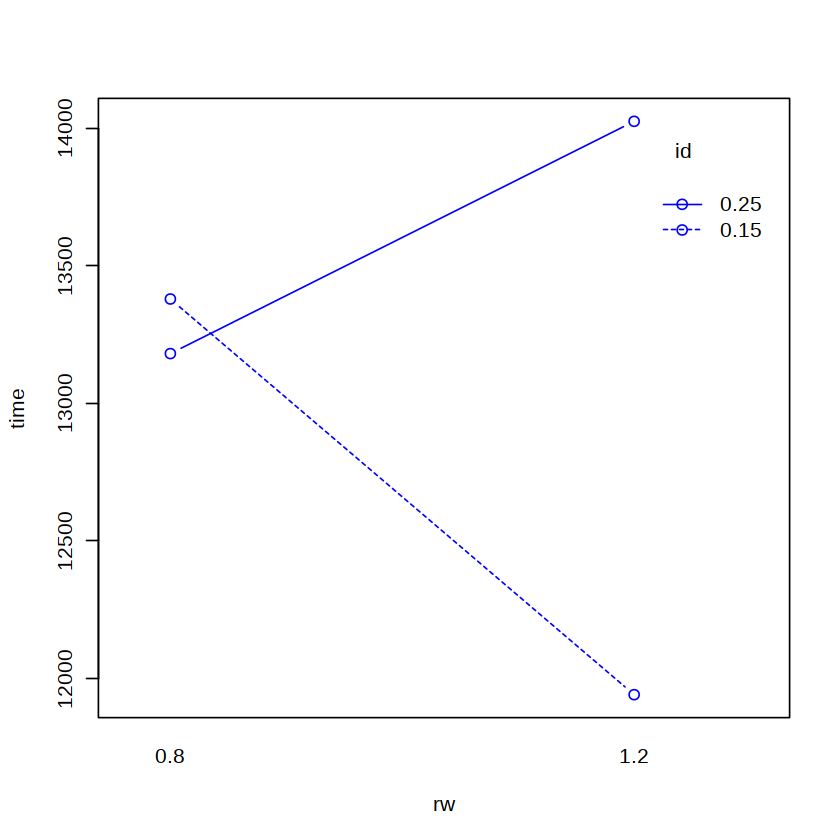

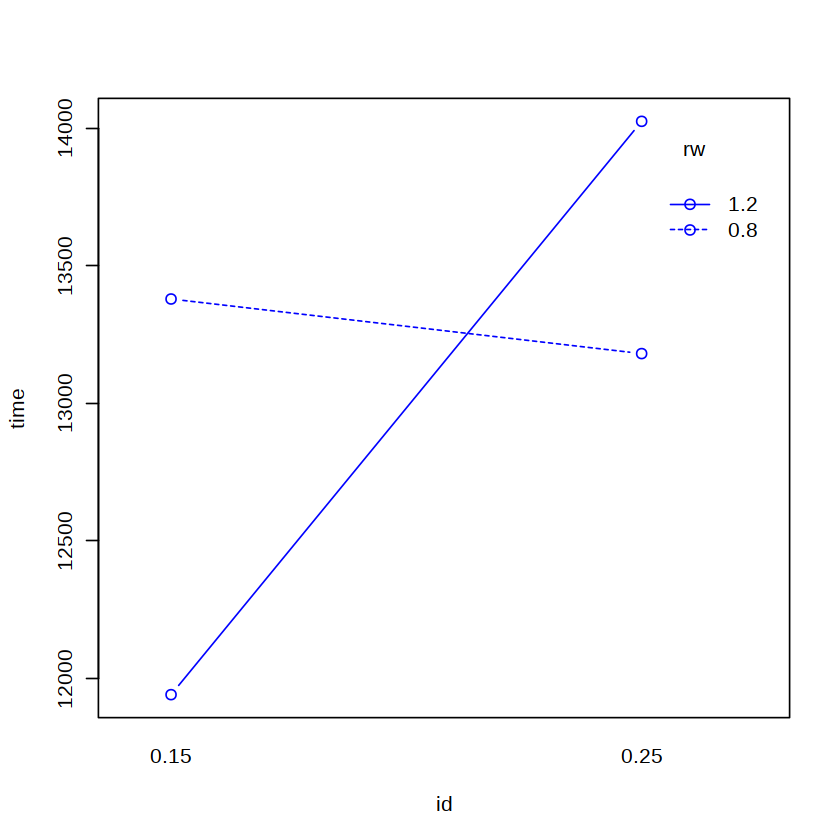

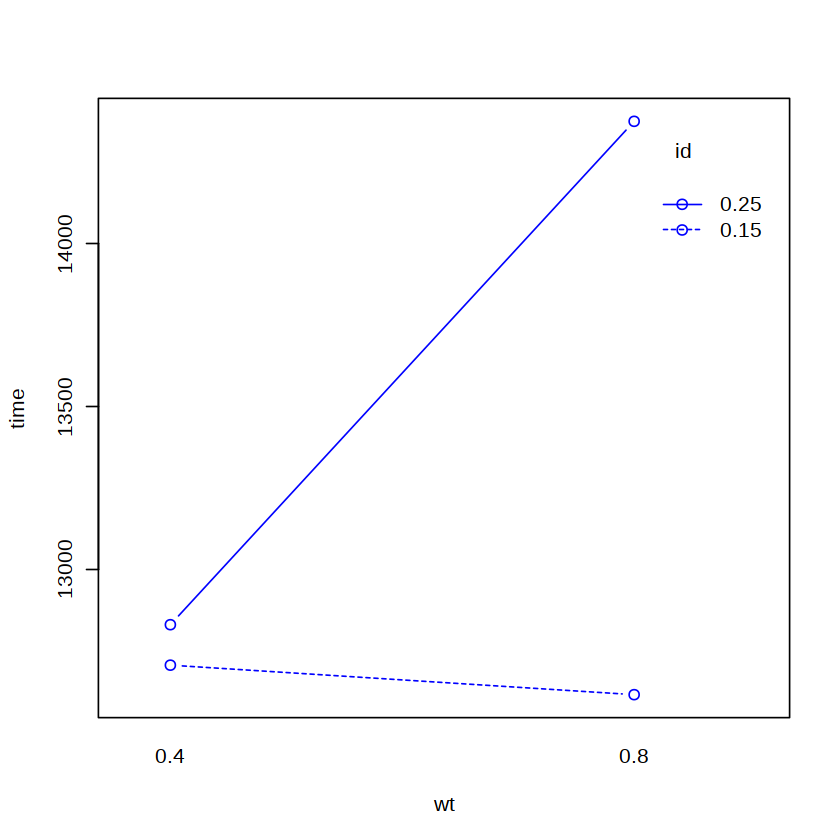

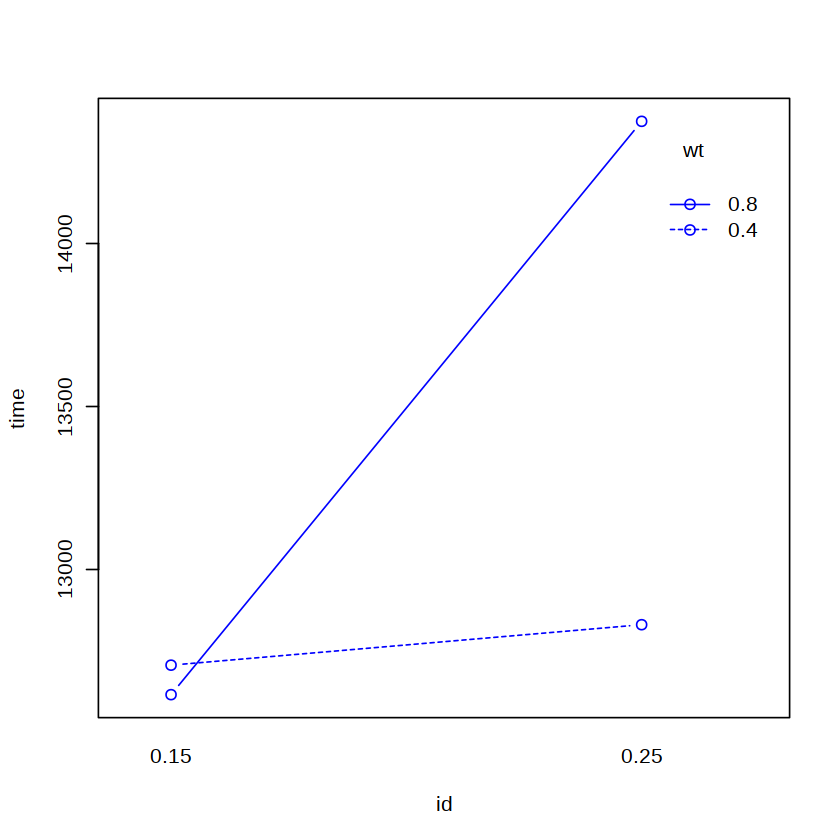

In [31]:
interaction.plot(df.time$arw, df.time$aid, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="time", trace.lab="id")

interaction.plot(df.time$aid, df.time$arw, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="time", xlab="id")

interaction.plot(df.time$awt, df.time$aid, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="time", trace.lab="id")

interaction.plot(df.time$aid, df.time$awt, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="time", xlab="id")

In [32]:
## Interactions: Raster Width (rw)

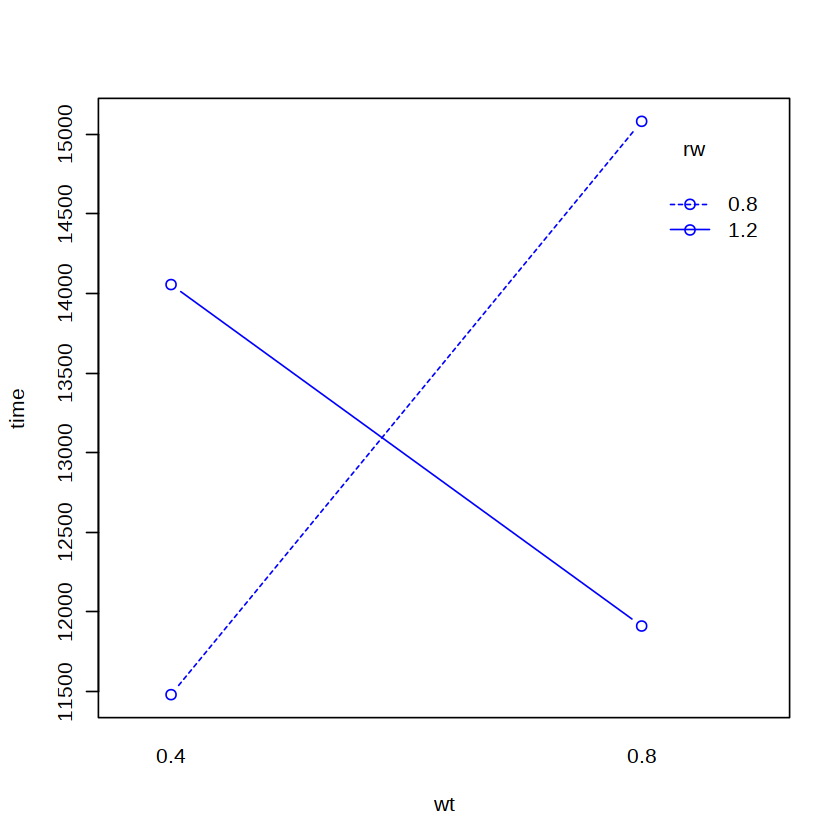

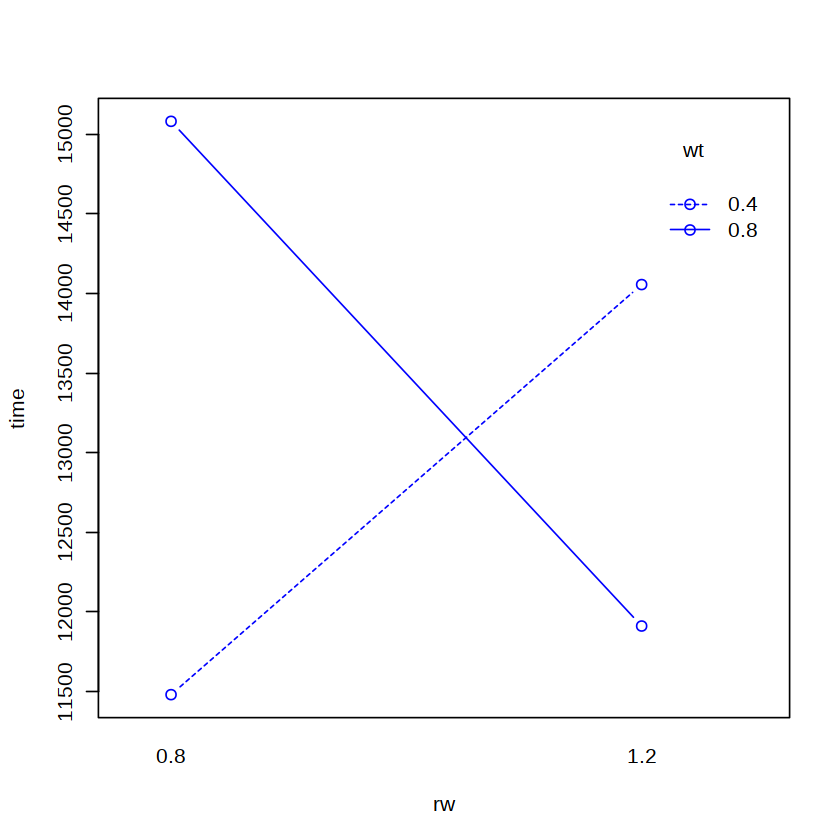

In [33]:
interaction.plot(df.time$awt, df.time$arw, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="time", trace.lab="rw")

interaction.plot(df.time$arw, df.time$awt, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="time", xlab="rw")

# Cost Response Surface Models

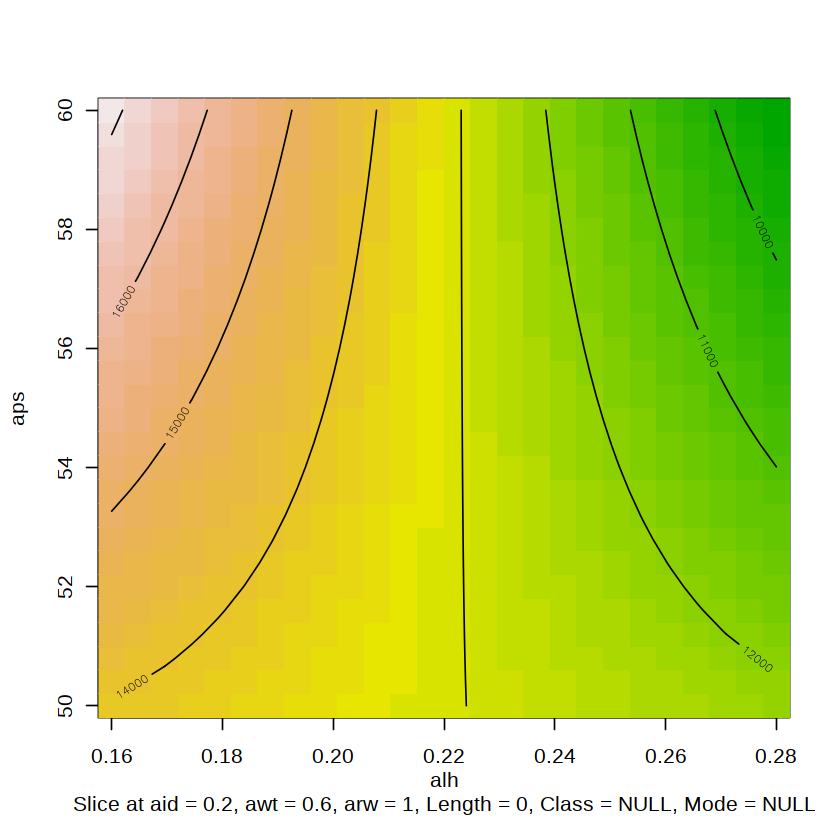

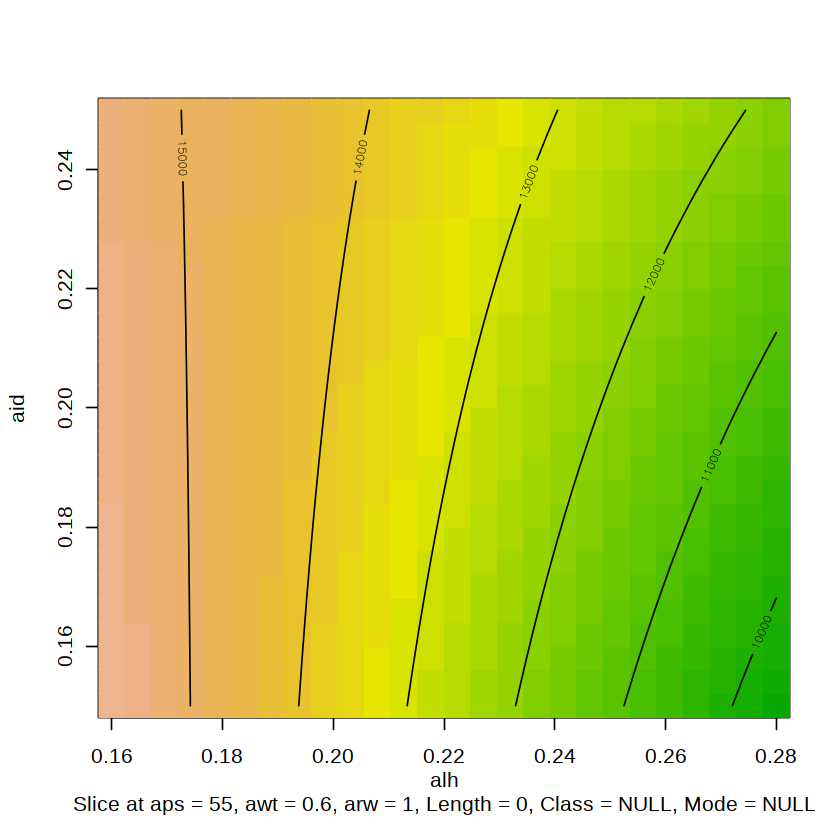

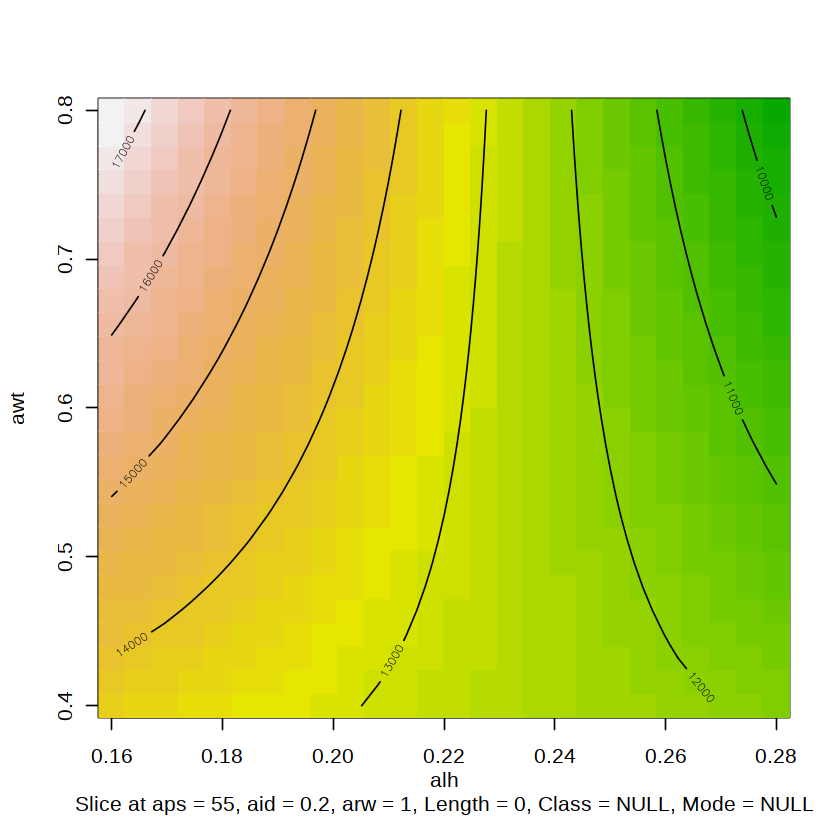

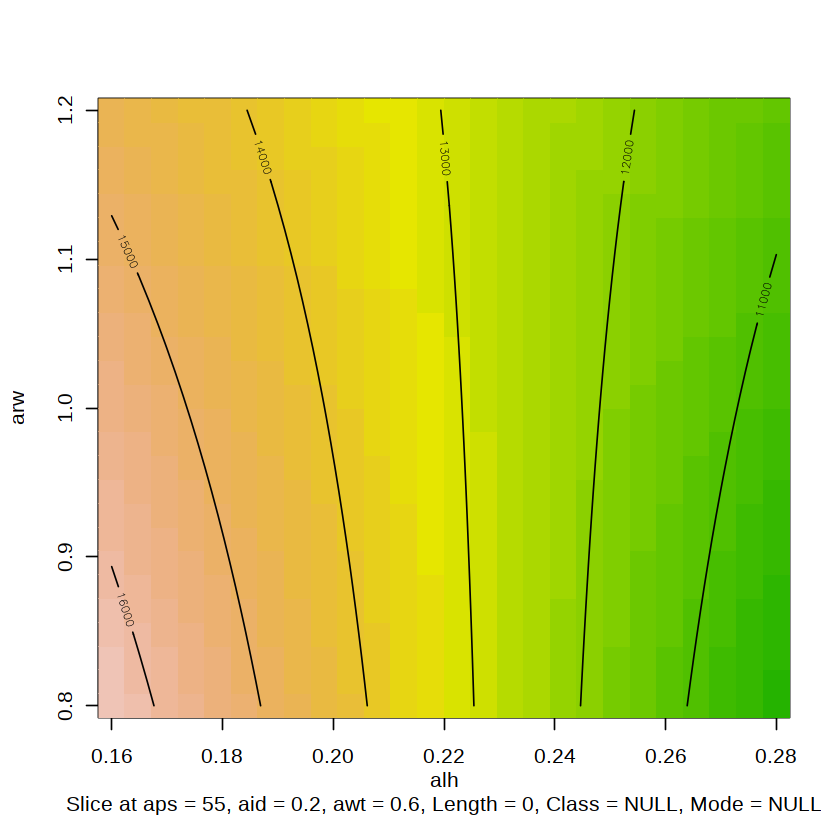

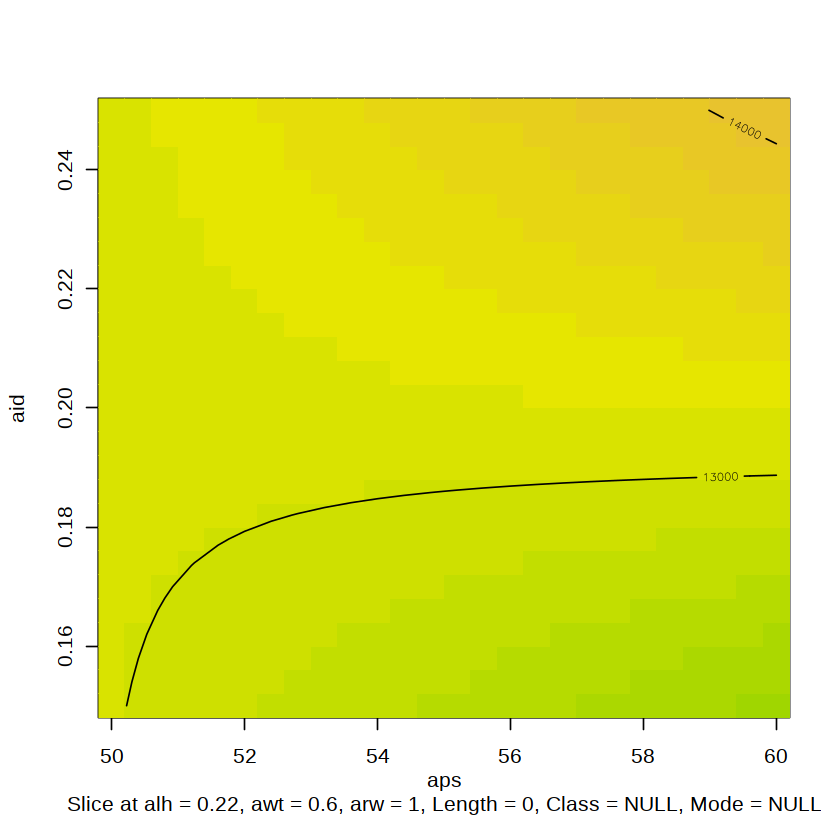

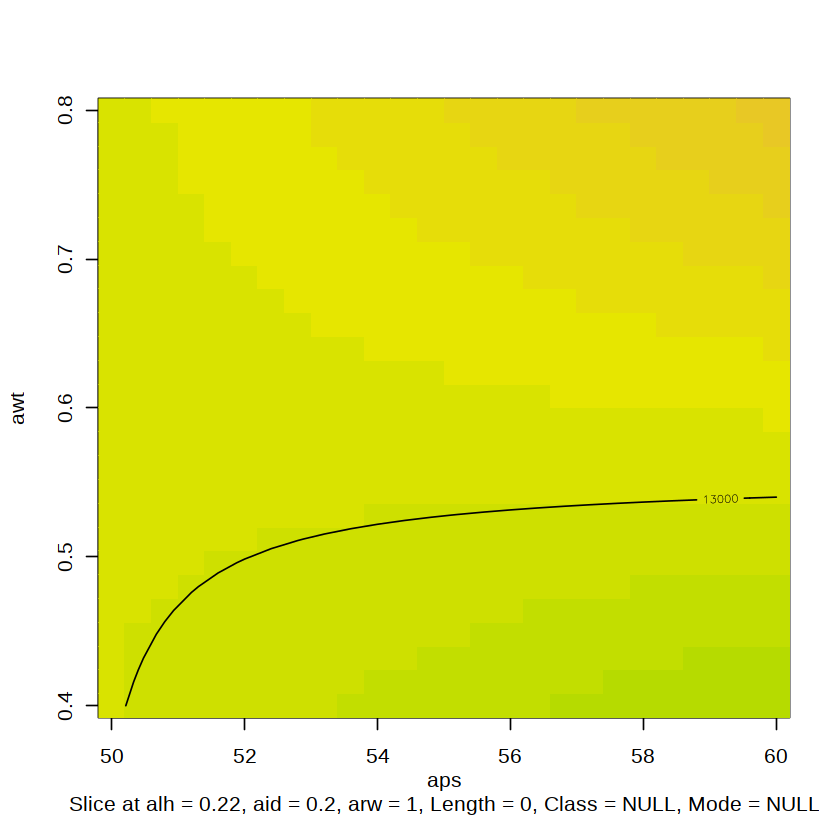

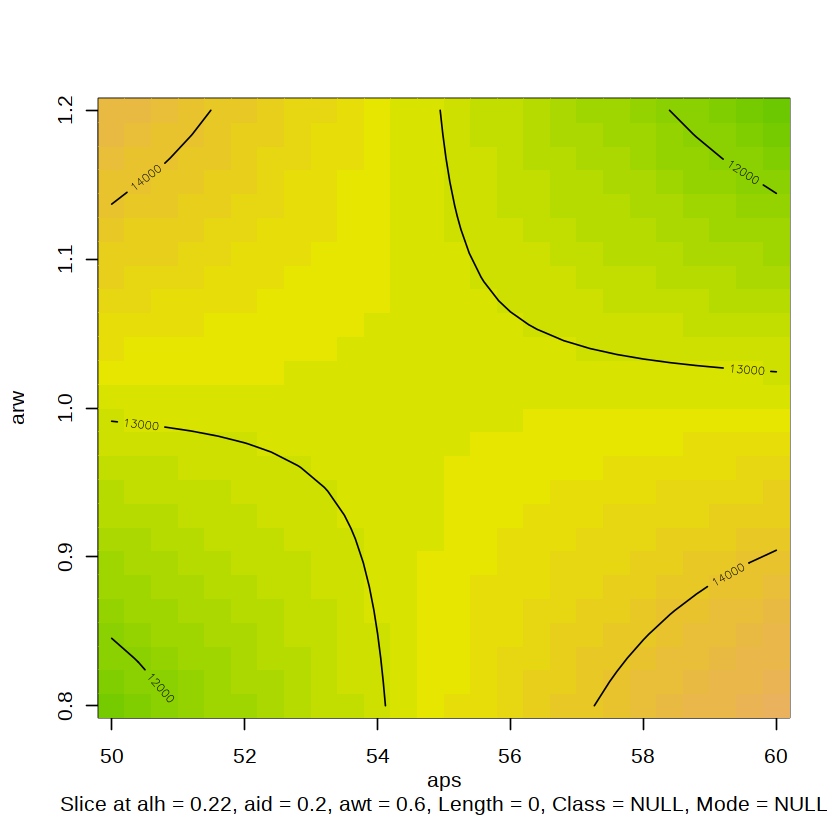

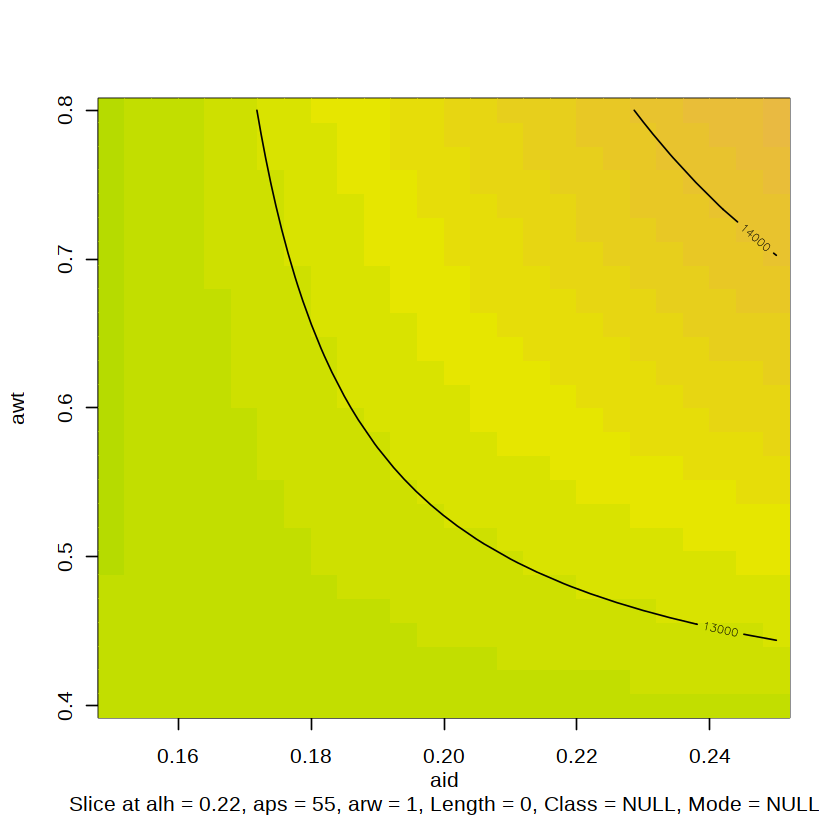

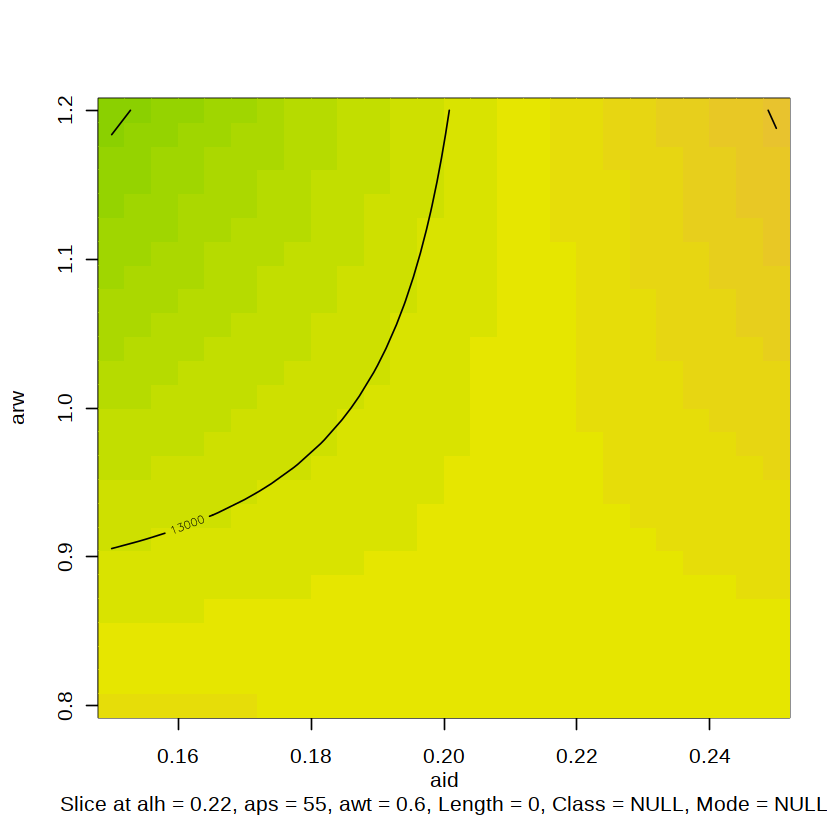

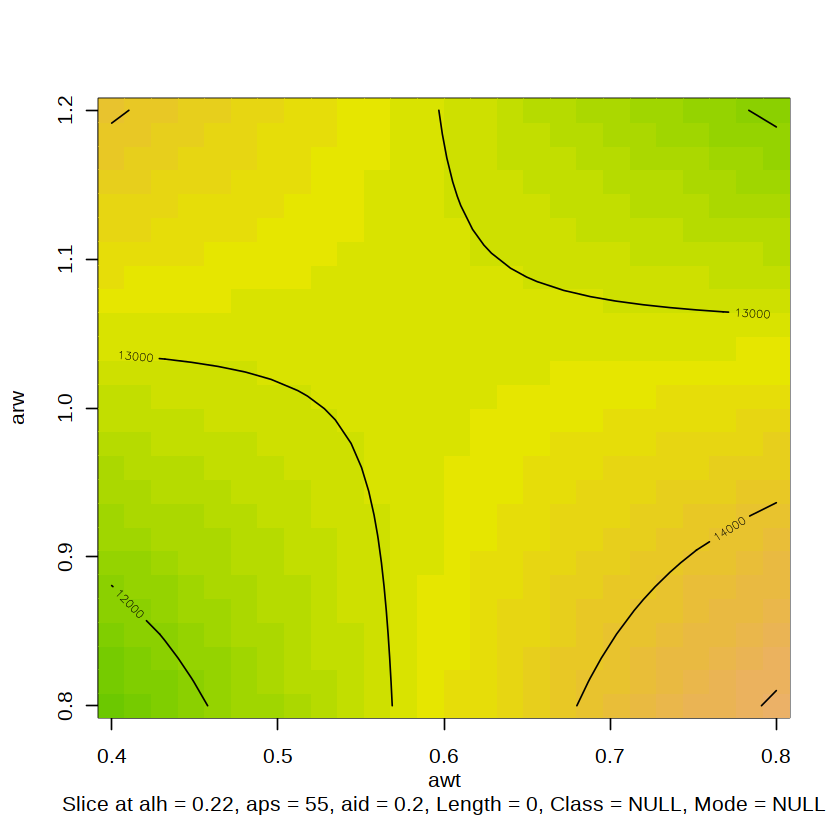

In [34]:
#contour plots 
par(mfrow=c(1,1))
suppressWarnings(
    contour(time_rsm, ~alh + aps + aid + awt + arw, image=TRUE, at=summary(time_rsm$canoncial$xs))
    )


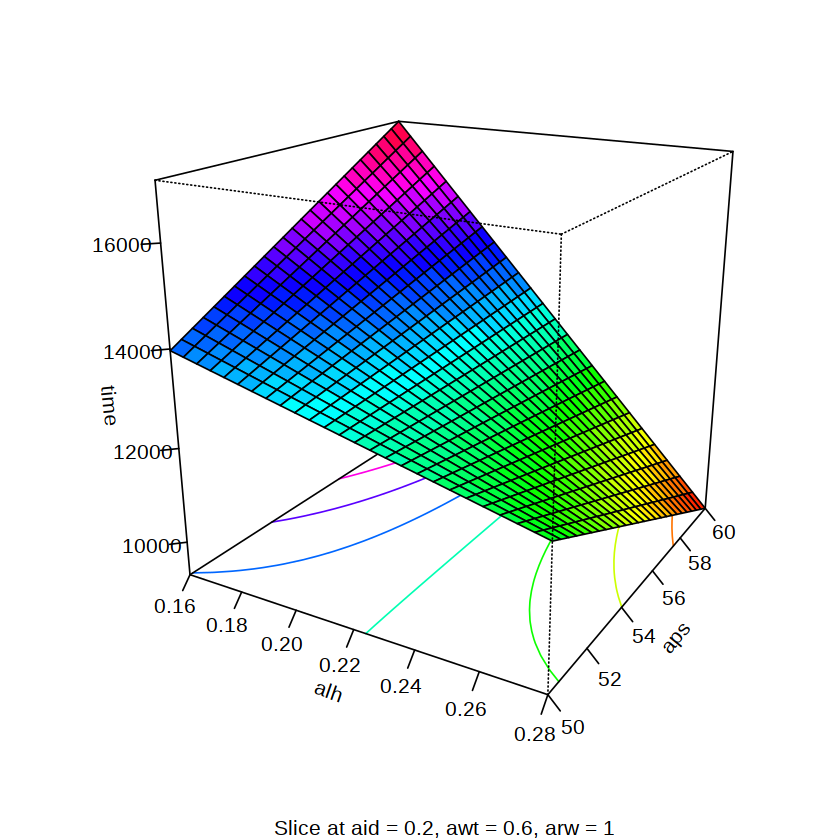

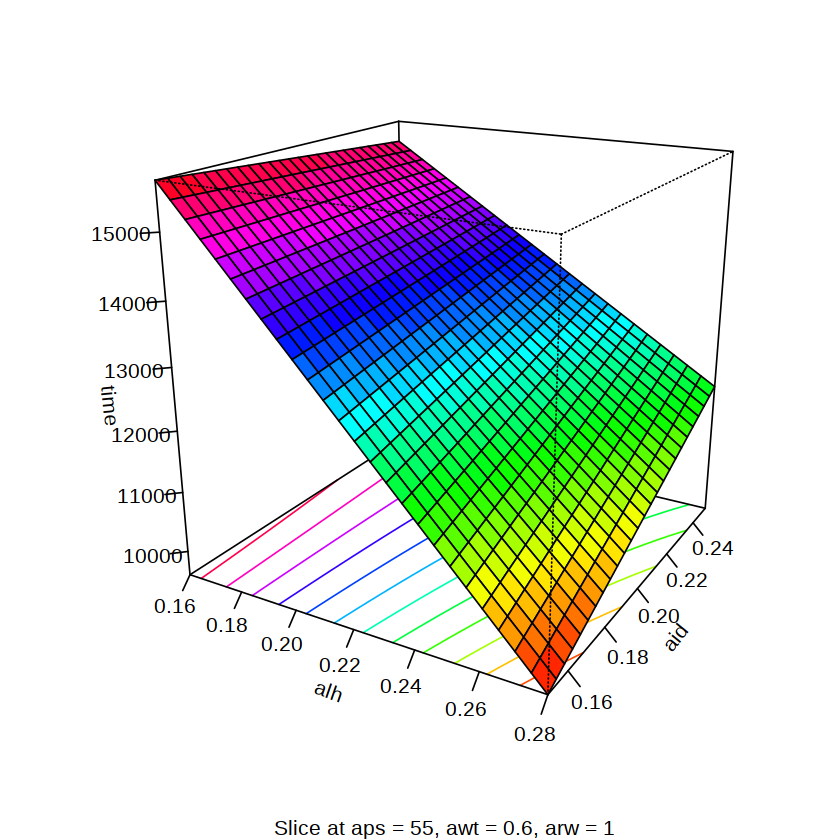

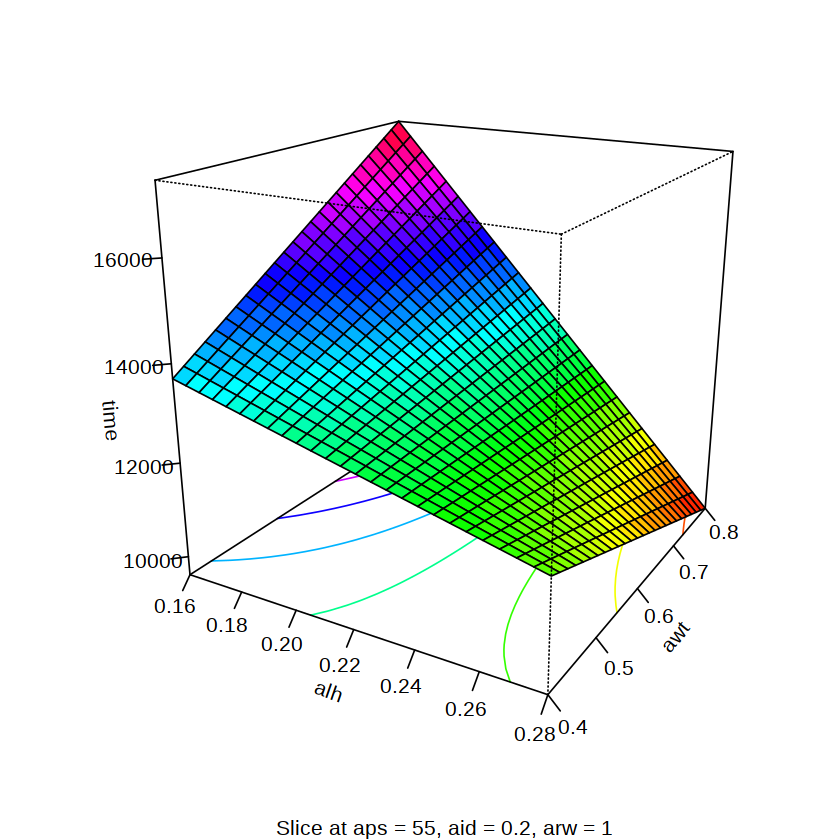

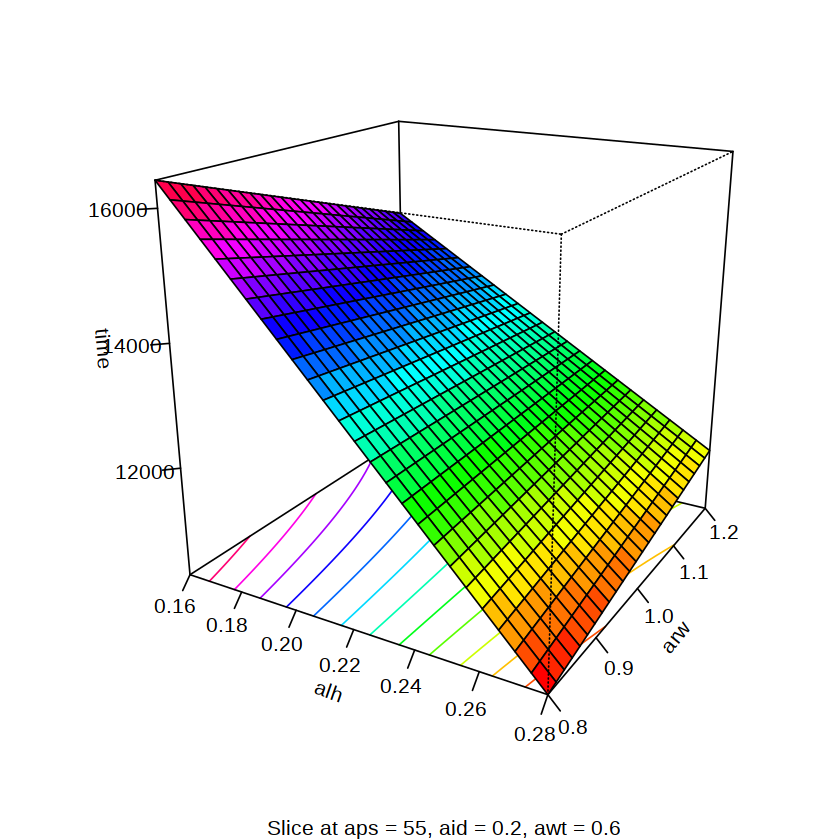

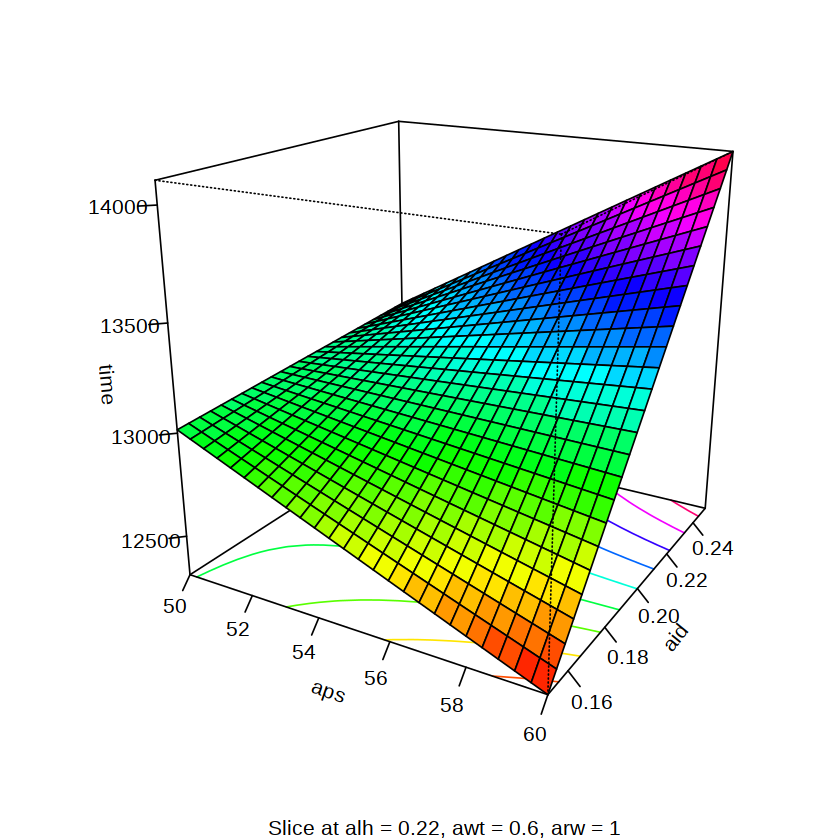

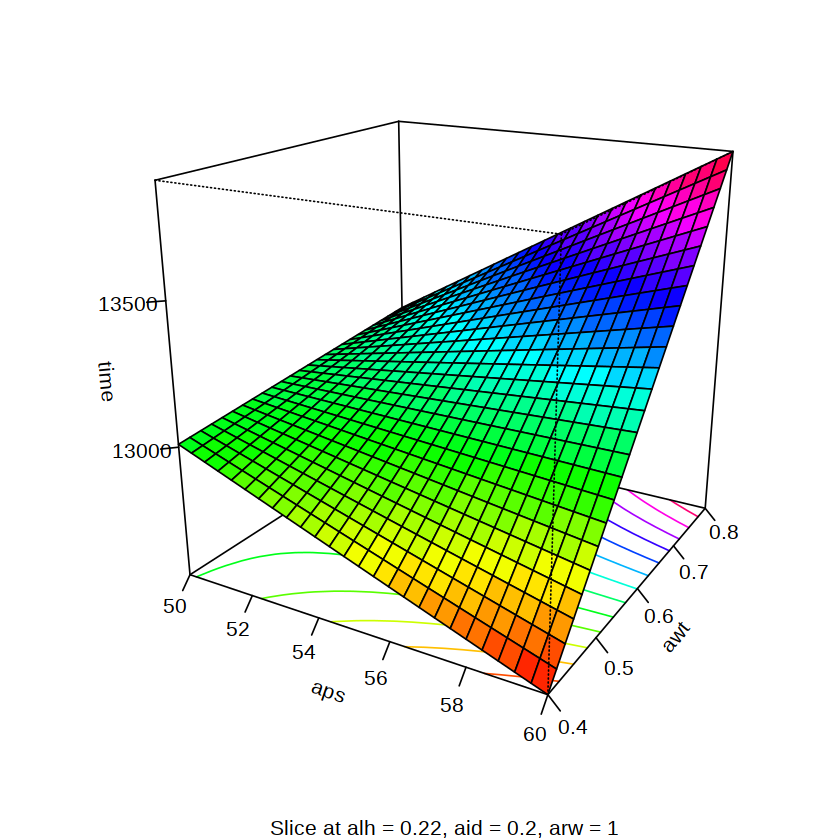

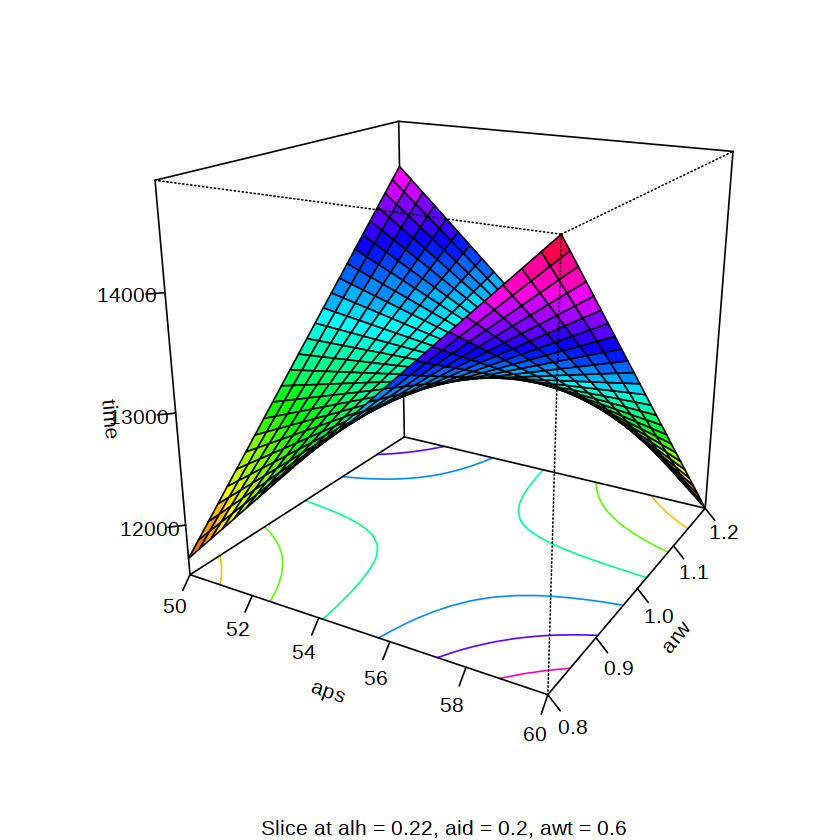

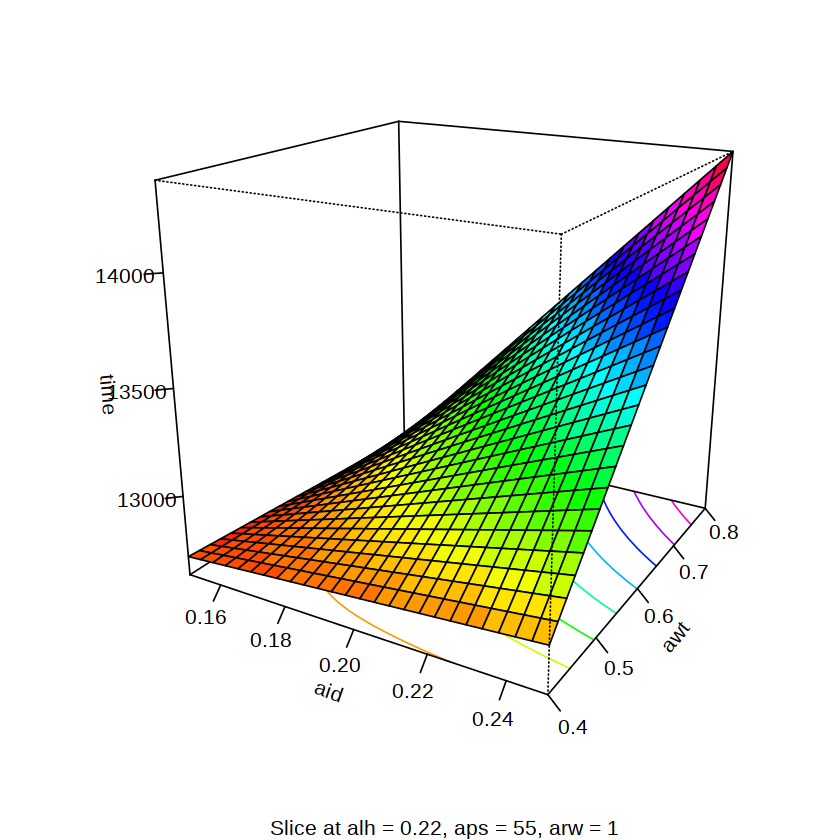

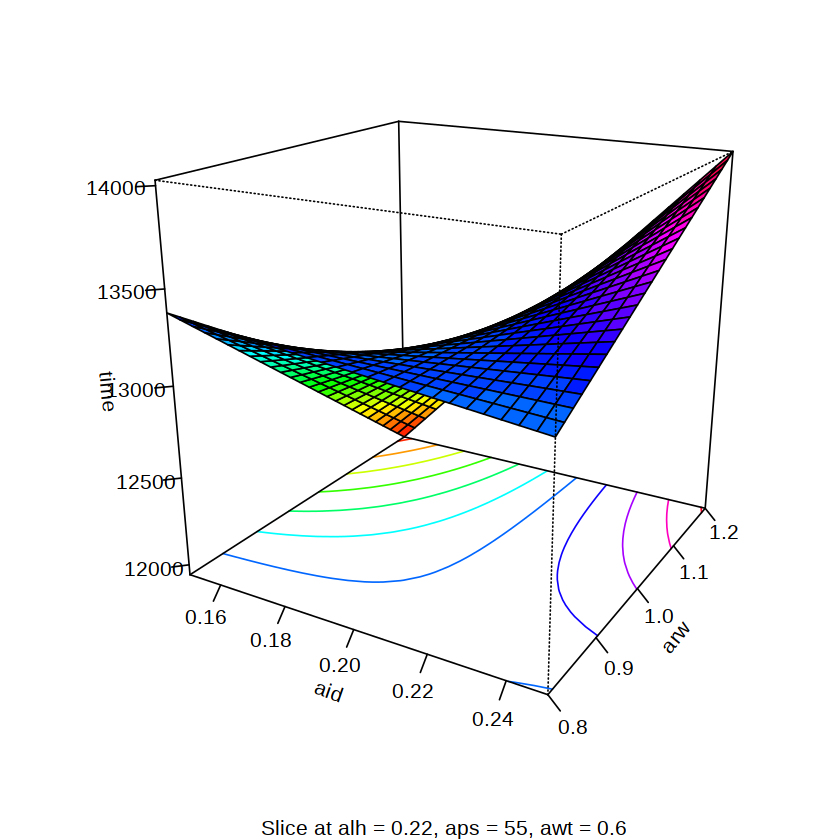

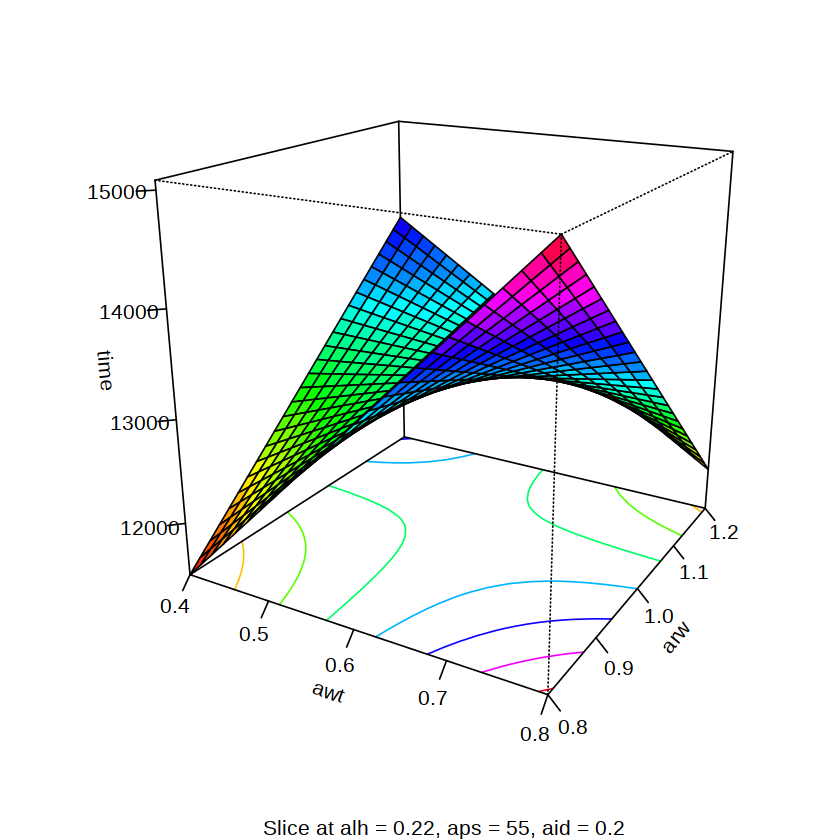

In [35]:
# Generate plots taking two factors at a time

par(mfrow=c(1,1))

suppressWarnings(
    persp(time_rsm,~alh+aps,image=TRUE,contour="colors",zlab="time",theta=30)   
    )
suppressWarnings(
    persp(time_rsm,~alh+aid,image=TRUE,contour="colors",zlab="time",theta=30)   
    )
suppressWarnings(
    persp(time_rsm,~alh+awt,image=TRUE,contour="colors",zlab="time",theta=30)   
    )
suppressWarnings(
    persp(time_rsm,~alh+arw,image=TRUE,contour="colors",zlab="time",theta=30)   
    )
suppressWarnings(
    persp(time_rsm,~aps+aid,image=TRUE,contour="colors",zlab="time",theta=30)   
    )
suppressWarnings(
    persp(time_rsm,~aps+awt,image=TRUE,contour="colors",zlab="time",theta=30)   
    )
suppressWarnings(
    persp(time_rsm,~aps+arw,image=TRUE,contour="colors",zlab="time",theta=30)   
    )
suppressWarnings(
    persp(time_rsm,~aid+awt,image=TRUE,contour="colors",zlab="time",theta=30)   
    )
suppressWarnings(
    persp(time_rsm,~aid+arw,image=TRUE,contour="colors",zlab="time",theta=30)   
    )
suppressWarnings(
    persp(time_rsm,~awt+arw,image=TRUE,contour="colors",zlab="time",theta=30)   
    )

## Optimized Equations

## Cost

In [36]:
summary(cost_rsm)


Call:
rsm(formula = cost ~ SO(alh, aps, aid, awt, arw), data = df.cost)

Residuals:
   Min     1Q Median     3Q    Max 
-0.024  0.000  0.000  0.000  0.006 

Coefficients: (5 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          0.3748333  0.0361704  10.363 2.54e-15 ***
FO(alh, aps, aid, awt, arw)alh       0.0041667  0.0819680   0.051  0.95962    
FO(alh, aps, aid, awt, arw)aps      -0.0029833  0.0006021  -4.955 5.59e-06 ***
FO(alh, aps, aid, awt, arw)aid       0.0900000  0.0976281   0.922  0.36006    
FO(alh, aps, aid, awt, arw)awt       0.3050000  0.0249061  12.246  < 2e-16 ***
FO(alh, aps, aid, awt, arw)arw       0.1925000  0.0237500   8.105 2.10e-11 ***
TWI(alh, aps, aid, awt, arw)alh:aps  0.0033333  0.0012500   2.667  0.00969 ** 
TWI(alh, aps, aid, awt, arw)alh:aid -0.7500000  0.1250000  -6.000 1.01e-07 ***
TWI(alh, aps, aid, awt, arw)alh:awt  0.1875000  0.0312500   6.000 1.01e-07 *

### Cost Equation

```sh
Cost = .3748333 + .0041667*alh - .0041667*aps + 0.09*aid + .305*awt + .1925*arw + .0033333*alh*aps - .75*alh*aid + .1875*alh*awt - .1875*alh*arw + .009*aps*aid - .00225*aps*awt + .00225*aps*arw + .35*aid*awt - .6*aid*arw - .225*awt*arw
```


## Time

In [37]:
summary(time_rsm)


Call:
rsm(formula = time ~ SO(alh, aps, aid, awt, arw), data = df.time)

Residuals:
    Min      1Q  Median      3Q     Max 
-6370.6   -86.3    -0.7    27.6 25359.4 

Coefficients: (5 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -95522.2    38534.3  -2.479 0.015825 *  
FO(alh, aps, aid, awt, arw)alh       208852.5    87325.0   2.392 0.019721 *  
FO(alh, aps, aid, awt, arw)aps         2111.7      641.4   3.292 0.001621 ** 
FO(alh, aps, aid, awt, arw)aid      -213627.2   104008.6  -2.054 0.044071 *  
FO(alh, aps, aid, awt, arw)awt        39419.8    26533.8   1.486 0.142283    
FO(alh, aps, aid, awt, arw)arw        80131.6    25302.2   3.167 0.002360 ** 
TWI(alh, aps, aid, awt, arw)alh:aps   -5032.1     1331.7  -3.779 0.000348 ***
TWI(alh, aps, aid, awt, arw)alh:aid  216391.7   133169.3   1.625 0.109091    
TWI(alh, aps, aid, awt, arw)alh:awt -123279.2    33292.3  -3.703 0.000446 *

### Time Equation

```sh
Time = -95522.2 + 208852.5*alh + 2111.7*aps  -213627.2*aid + 39419.8*awt + 80131.6*arw - 5032.1*alh*aps + 216391.7*alh*aid - 123279.2*alh*awt + 58335.4*alh*arw + 1705.9*aps*aid + 313.4*aps*awt - 1519.7*aps*arw + 40930.0*aid*awt + 57067.5*aid*arw - 35898.7*awt*arw
```


# Desirability

In [38]:
costPred <-function(x) .3748333 + .0041667*df.cost$alh - .0041667*df.cost$aps + 0.09*df.cost$aid + .305*df.cost$awt + .1925*df.cost$arw + .0033333*df.cost$alh*df.cost$aps - .75*df.cost$alh*df.cost$aid + .1875*df.cost$alh*df.cost$awt - .1875*df.cost$alh*df.cost$arw + .009*df.cost$aps*df.cost$aid - .00225*df.cost$aps*df.cost$awt + .00225*df.cost$aps*df.cost$arw + .35*df.cost$aid*df.cost$awt - .6*df.cost$aid*df.cost$arw - .225*df.cost$awt*df.cost$arw



In [42]:
timePred <-function(x) -95522.2 + 208852.5*df.time$alh + 2111.7*df.time$aps  -213627.2*df.time$aid + 39419.8*df.time$awt + 80131.6*df.time$arw - 5032.1*df.time$alh*df.time$aps + 216391.7*df.time$alh*df.time$aid - 123279.2*df.time$alh*df.time$awt + 58335.4*df.time$alh*df.time$arw + 1705.9*df.time$aps*df.time$aid + 313.4*df.time$aps*df.time$awt - 1519.7*df.time$aps*df.time$arw + 40930.0*df.time$aid*df.time$awt + 57067.5*df.time$aid*df.time$arw - 35898.7*df.time$awt*df.time$arw



[1] 0

[1] 0

[1] 0

[1] 111.0397399   0.7488587  39.8461104
